# Assignment 4: Movie Review Analysis [50 Pt]

In this assignment, we will build a recurrent neural network to work with sequential text data, specificially, movie review data to identify the reviewer sentiment. In the process of completing this assignment, you will:
    
1. Clean and process text data for machine learning.
2. Perform tokenization of text data.
3. Understand and implement a word-level recurrent neural network.
4. Implement batching of text data using a DataLoader before training a recurrent neural network.
5. Understand how to apply pretrained models for transfer learning in natural language processing projects.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

This year we will be using an autograding script to check your model performance on a hidden test set. To do this, we need you to provide your model definition and your model weights along with your assignment submission.

Instructions on the additional files you need to submit are provided below. Please make sure to test your submitted files before submitting them, failure in loading these files may result in a grade of 0 in the results section of the assignment.

# 📑 **Autograding**

This assignment uses an autograding script to **evaluate your model performance on a hidden test set**. You must provide your model definition and model weights along with your assignment submission to ensure compatibility with the autograding system.

---

## 📁 **Required Files for Submission**

You need to submit the following **four files** in addition to the **HTML file** as previously instructed. Make sure to replace `your_name_connected_by_underscore` and `your_student_id` with your actual name and student ID, respectively:

1. **RNN Model Definition:** `A4-RNN-your_name_connected_by_underscore-your_student_id.py`
2. **RNN Model Weights:** `A4-RNN-your_name_connected_by_underscore-your_student_id.pth`
3. **BERT Model Definition:** `A4-BERT-your_name_connected_by_underscore-your_student_id.py`
4. **BERT Model Weights:** `A4-BERT-your_name_connected_by_underscore-your_student_id.pth`

---

## 🧑‍💻 **Model Definition Files (`.py`)**

### 📝 **Steps to Complete:**

1. **Copy Model Definition Code:** Copy the complete model definition code from your `A4.ipynb` notebook into the provided template files (`.py`).
2. **Complete the TODOs:** Make sure all TODOs in the files are properly completed:
   - Define your model class (`SentimentRNN` or `SentimentClassifier`).
   - Implement the `prepare_model()` function with the exact hyperparameters used during training.
   - Ensure preprocessing steps match those in your notebook.
   - Set the `EMBEDDINGS_TYPE` parameter appropriately (`'pooled'` or `'last_hidden_state'` for BERT).
3. **Command-Line Usability:** Ensure the script accepts a file path as an argument and runs from the command line as described in the file headers.

---

### 💻 **Example Command-Line Usage**

```bash
python A4-RNN-your_name_connected_by_underscore-your_student_id.py /path/to/test_dataset.csv
```
---


## 💾 **Model Weights Files (`.pth`)**

1. **Save Model Weights:** During training, save your model's best-performing weights using the `torch.save()` method.
2. **Naming Convention:** Ensure the `.pth` file names match the `.py` file names exactly, except for the file extension.
3. **Example Code for Saving Weights:**

```python
torch.save(model.state_dict(), 'A4-RNN-your_name_connected_by_underscore-your_student_id.pth')
```
---

## ✅ **Testing Your Submission: Autograder Compatibility**

You will be provided with an **"Example Test IMDB Dataset.csv"** that you can use to test your autograding file compatibility. Please follow the example command line usage to provide the test data to test the script for each of the two `.py` scripts you are submitting.

### 🧪 **How to Test:**

1. **Run the Test Notebook:** Open and run the `test_your_submitted_files.ipynb` notebook.
2. **Verify Output:** Ensure the notebook can:
   - Load your `.py` model definition files.
   - Load your `.pth` model weights files.
   - Run predictions correctly using the provided **Example Test IMDB Dataset.csv**.
3. **Debug as Needed:** If any step fails, debug the issue and retest before submission (You can ask for help on Piazza!).

---

### 🚦 **Autograder Sentinel Lines**

Make sure your scripts output predictions between the sentinel lines **exactly** as shown below:

```text
===start_output===
0
1
0
1
...
===end_output===
```

## Colab Link

Include a link to your Colab file here. If you would like the TA to look at your Colab file in case your solutions are cut off, **please make sure that your Colab file is publicly accessible at the time of submission.**

In [ ]:
# TO BE COMPLETED

# https://colab.research.google.com/drive/1pfLARG6hS1Yet6hhILYBgjyC1xthH0vR#scrollTo=5s7OtrB7hhhE

# PART A - Sentiment Analysis

In this part we will construct a world-level LSTM model for identifying positive and negative reviews. This will be done in a similar way to what was shared in the preparation code for Assignment 4.

In [ ]:
# load standard modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# load special modules/libraries
import os
import warnings
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from collections import Counter
import string
import re
from tqdm.auto  import tqdm

# load pytorch modules/libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Part 1. Data Cleaning [5 pt]

We will be using the "IMDB Movie Review Dataset" provided on the course website. Download "IMDB Dataset.csv" into your Colab workspace.

### Part (i) [1pt EXPLORATORY]

Open up the file in Python, and examine some examples of positive and negative reviews. Comment on the quality of the data and any challenges you foresee in working with these data. Pick one example of a positive review and one of a negative review to support your comments.

In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Move current directory to Assignment Folder
%cd /content/drive/Othercomputers/My laptop/Desktop/UofT/Term\ 2/MIE\ 1517/Assignment/Assignment\ 4

# List current directory files
!dir


/content/drive/Othercomputers/My laptop/Desktop/UofT/Term 2/MIE 1517/Assignment/Assignment 4
A4_additional_files.zip  Checkpoint	    PartBCheckpoint  test_embeds   valid_embeds
A4.ipynb		 IMDB\ Dataset.csv  Submission	     train_embeds


In [ ]:
# download IMDB review data

# load dataset
df = pd.read_csv("IMDB Dataset.csv")

# process into data and labels
X = df['review'].values
y = df['sentiment'].values


In [ ]:
negative = X[y == 'negative']
positive = X[y == 'positive']

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Quality of data:
- The dataset consists of user-submitted IMDB movie reviews labeled as either positive or negative
- Some reviews contain HTML tags <br \> which may require preprocessing
- The sentiment labels appear to be clean and clearly defined


Challenges:
- Subjectivity: Some reviews contain mixed sentiments, making classification harder
- Noisy Data: Reviews soemtimes include typos, informal language, and extraneous information
- Long Reviews: Some reviews are quite long, making feature extraction computationally expensive
- Use of Sarcasm: Some reviews  may have sarcasm, which is difficult for simple NLP models to detect.


Positive review example: (Mixed Sentiment)
"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me... However it deserves 8/10",positive

Negative review example: (Irony and Sarcasm)
"The film quickly gets to a major chase scene...
It seems like they decided to make all kinds of changes in the movie plot...
I does give me some hope that Steven Seagal is trying to move back towards the type of characters he portrayed in his more popular movies.",negative

'''


'\nPROVIDE YOUR ANSWER BELOW\n\nQuality of data:\n- The dataset consists of user-submitted IMDB movie reviews labeled as either positive or negative\n- Some reviews contain HTML tags <br \\> which may require preprocessing\n- The sentiment labels appear to be clean and clearly defined\n\n\nChallenges:\n- Subjectivity: Some reviews contain mixed sentiments, making classification harder\n- Noisy Data: Reviews soemtimes include typos, informal language, and extraneous information\n- Long Reviews: Some reviews are quite long, making feature extraction computationally expensive\n- Use of Sarcasm: Some reviews  may have sarcasm, which is difficult for simple NLP models to detect.\n\n\nPositive review example: (Mixed Sentiment)\n"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me... However it deserves 8/10",positive\n\nNegative review example: (Irony and Sarcasm)\n"The film quickly gets to a major chase scene... \nIt seem

### Part (ii) [1pt EXPLORATORY]

Perform summary statistics on the dataset. What is the average character length of a review? What are the lengths of the longest and shortest reviews?

How many positive reviews and negative reviews are there. Generate a histogram to compare the average character length for positive and negative reviews. Comment on the differences in positive and negative reviews and how that may affect the model you will be using later.

Average Character length of a review 1311.239225
Longest review length 13704.0
Shortest review length 32.0
Number of positive reviews 20004
Number of negative reviews 19996


Text(0, 0.5, 'Frequency')

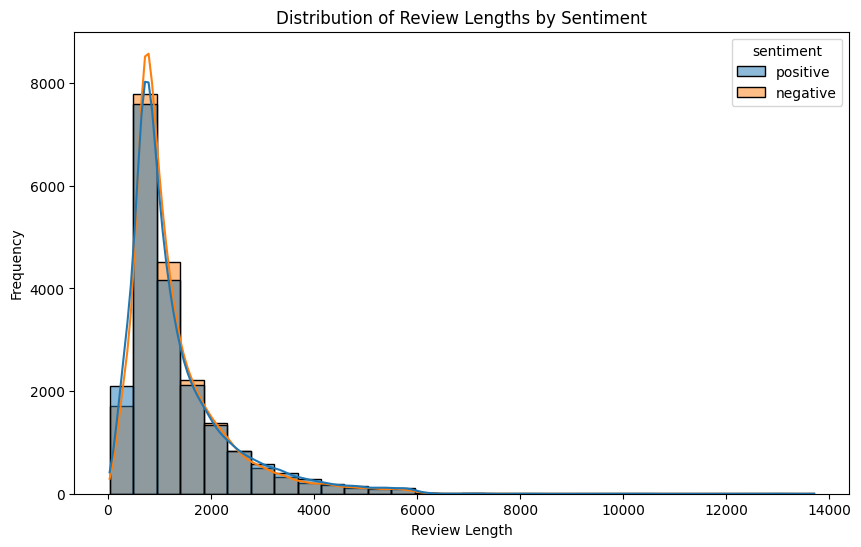

In [ ]:
# TO BE COMPLETED

# Create a dataframe
df = pd.DataFrame({'review': X, 'sentiment': y})

# Calculate review lengths
df['review_length'] = df['review'].apply(len)

# Summary statistics
summary_stats = df['review_length'].describe()

print(f"Average Character length of a review {summary_stats['mean']}")
print(f"Longest review length {summary_stats['max']}")
print(f"Shortest review length {summary_stats['min']}")
print(f"Number of positive reviews {len(positive)}")
print(f"Number of negative reviews {len(negative)}")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', kde=True, bins=30)
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

General observations:

- The dataset contains reviews averaging around 1311 characters, with significant variation ranging from very short (13 characters) to extremely long reviews (13704 characters).

- The data is well-balanced between positive (20,004) and negative (19,996) reviews, suggesting minimal bias due to class imbalance, which is beneficial for model training.

Observations positive vs. negative:

- Positive and negative reviews have similar distributions, but positive reviews tend to be slightly longer on average.

- The similarity in review length distribution indicates that review length alone might not strongly predict sentiment; thus, the model should rely more on textual content rather than review length.


'''


'\nPROVIDE YOUR ANSWER BELOW\n\nGeneral observations:\n\n- The dataset contains reviews averaging around 1311 characters, with significant variation ranging from very short (13 characters) to extremely long reviews (13704 characters).\n\n- The data is well-balanced between positive (20,004) and negative (19,996) reviews, suggesting minimal bias due to class imbalance, which is beneficial for model training.\n\nObservations positive vs. negative:\n\n- Positive and negative reviews have similar distributions, but positive reviews tend to be slightly longer on average.\n\n- The similarity in review length distribution indicates that review length alone might not strongly predict sentiment; thus, the model should rely more on textual content rather than review length.\n\n\n'

### Part (iii) [1pt EXPLORATORY]

The following helper code will be used to process the data before we can train our LSTM model. In point form comment on what processing steps are performed in the code provided below and why these steps are necessary or beneficial to training and LSTM.

In [ ]:
def preprocess_string(str1):
    # remove all non-word characters excluding number and letters
    str1= re.sub(r"[^\w\s]",'',str1) #Replaces patterns matched by regular expressions
    # remove all whitespace with no space
    str1= re.sub(r"\s",'',str1)
    # replace digits with no space
    str1= re.sub(r"\d",'',str1)
    return str1

def preprocess_sentence(sen1):
    word_list=[]
    stop_word = set(stopwords.words("english")) #Retrieves common stopwords in English Language
    for word in sen1.lower().split():
        word = preprocess_string(word)
        if word not in stop_word and word!='':
            word_list.append(word)
    return word_list

def get_stoi(data): #String to index library
    word_list=[]
    for review in data:
        word_list.extend(preprocess_sentence(review))
    corpus = Counter(word_list) #Creates a dictinoary-like that counts occurrences of each unique word. It's useful for determing word frequency
    print(corpus.get)
    # sorting on the basis of most common words
    corpus_ =sorted(corpus,key= corpus.get,reverse=True)[:1000] #Return a list of the 1000 most common elements (Words) and their counts, ordered from the most common to the least.
    # creating a dict
    stoi =  {ch:i+1 for i,ch in enumerate(corpus_)} #Creates a dictionary mapping each word (ch) to a unique integer index.
    return stoi

def tokenize(data, labels, stoi):
    # tokenize
    data_encoded = []
    for review in data:
        data_encoded.append([stoi[word] for word in preprocess_sentence(review)
                             if word in stoi.keys()])

    labels_encoded = [1 if label =='positive' else 0 for label in labels]

    return np.array(data_encoded, dtype=object), np.array(labels_encoded)

def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review)!=0:
            features[ii, -len(review):] = np.array(review)[:seq_len]

    return features

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

- Removing non-alphanumeric characters and whitespace: Cleans the text data, reducing noise to help the LSTM learn meaningful patterns.

- Replacing digits: Ensures numeric noise does not distract the model from textual features.

- Lowercasing and removing stop words: Standardizes words and removes common words with little semantic meaning, thus highlighting meaningful words for sentiment prediction.

- Tokenizing text and building a vocabulary dictionary (stoi): Converts text into numeric indices, allowing the LSTM model to process the text numerically.

- Selecting top 1000 most common words: Reduces vocabulary size, focusing on words most relevant to sentiment analysis, improving model efficiency.

- Encoding reviews and labels: Prepares data into numerical arrays suitable for machine learning models.

- Padding sequences: Ensures all input sequences have equal length, a necessary step for efficient batch processing by the LSTM.

'''


'\nPROVIDE YOUR ANSWER BELOW\n\n- Removing non-alphanumeric characters and whitespace: Cleans the text data, reducing noise to help the LSTM learn meaningful patterns.\n\n- Replacing digits: Ensures numeric noise does not distract the model from textual features.\n\n- Lowercasing and removing stop words: Standardizes words and removes common words with little semantic meaning, thus highlighting meaningful words for sentiment prediction.\n\n- Tokenizing text and building a vocabulary dictionary (stoi): Converts text into numeric indices, allowing the LSTM model to process the text numerically.\n\n- Selecting top 1000 most common words: Reduces vocabulary size, focusing on words most relevant to sentiment analysis, improving model efficiency.\n\n- Encoding reviews and labels: Prepares data into numerical arrays suitable for machine learning models.\n\n- Padding sequences: Ensures all input sequences have equal length, a necessary step for efficient batch processing by the LSTM.\n\n'

### Part (iv) [1pt EXPLORATORY]

Split the dataset into `train`, `valid`, and `test`. Use a 60-20-20 split. Then apply the above processing steps to prepare your data for training.

Set the padding of the reviews to 500.

In [ ]:
# TO BE COMPLETED

from sklearn.model_selection import train_test_split

# First split into train and temp (valid + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Then split temp into valid and test (each 20% of total)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Generate stoi dictionary
stoi = get_stoi(X_train)

# Tokenize the datasets
X_train_encoded, y_train_encoded = tokenize(X_train, y_train, stoi)
X_valid_encoded, y_valid_encoded = tokenize(X_valid, y_valid, stoi)
X_test_encoded, y_test_encoded = tokenize(X_test, y_test, stoi)

# Padding to length 500
X_train_padded = padding_(X_train_encoded, 500)
X_valid_padded = padding_(X_valid_encoded, 500)
X_test_padded = padding_(X_test_encoded, 500)

<built-in method get of Counter object at 0x7acb0ec3c3b0>


### Part (v) [1pt EXPLORATORY]

Create a DataLoader that will allow you to load the training and validation data in mini-batches. Then generate a dataset of batch size of 16 to verify that the DataLoader works as intended.

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert numpy arrays to PyTorch tensors
train_data = torch.tensor(X_train_padded, dtype=torch.long)
train_labels = torch.tensor(y_train_encoded, dtype=torch.long)

valid_data = torch.tensor(X_valid_padded, dtype=torch.long)
valid_labels = torch.tensor(y_valid_encoded, dtype=torch.long)

test_data = torch.tensor(X_test_padded, dtype=torch.long)
test_labels = torch.tensor(y_test_encoded, dtype=torch.long)

# Create TensorDataset objects
train_dataset = TensorDataset(train_data, train_labels)
valid_dataset = TensorDataset(valid_data, valid_labels)
test_dataset = TensorDataset(test_data, test_labels)

# Create DataLoader objects with batch_size of 16
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Verify DataLoader functionality
for batch_data, batch_labels in train_loader:
    print("Train batch data shape:", batch_data.shape)
    print("Train batch labels shape:", batch_labels.shape, "\n")
    break

for batch_data, batch_labels in valid_loader:
    print("Valid batch data shape:", batch_data.shape)
    print("Valid batch labels shape:", batch_labels.shape, "\n")
    break

for batch_data, batch_labels in test_loader:
    print("Test batch data shape:", batch_data.shape)
    print("Test batch labels shape:", batch_labels.shape)
    break

Train batch data shape: torch.Size([16, 500])
Train batch labels shape: torch.Size([16]) 

Valid batch data shape: torch.Size([16, 500])
Valid batch labels shape: torch.Size([16]) 

Test batch data shape: torch.Size([16, 500])
Test batch labels shape: torch.Size([16])


## Part 2. Model Building [2pt MODEL]

Build a recurrent neural network model, using an architecture of your choosing. Use one or more fully-connected layers to make the prediction based on your recurrent network output.

An example is provided below in `BaselineSentimentRNN`, which you can use for inspiration. However, you should build your own model.

Instead of using the RNN output value for the final token, another often used strategy is to max-pool over the entire output array. That is, instead of calling something like:

```
out, _ = self.rnn(x)
self.fc(out[:, -1, :])
```

where `self.rnn` is an `nn.RNN`, `nn.GRU`, or `nn.LSTM` module, and `self.fc` is a
fully-connected
layer, we use:

```
out, _ = self.rnn(x)
self.fc(torch.max(out, dim=1)[0])
```

This works reasonably in practice. An even better alternative is to concatenate the max-pooling and average-pooling of the RNN outputs:

```
out, _ = self.rnn(x)
out = torch.cat([torch.max(out, dim=1)[0],
                 torch.mean(out, dim=1)], dim=1)
self.fc(out)
```

We encourage you to try out all these options. The way you pool the RNN outputs is one of the "hyperparameters" that you can choose to tune later on.

In [ ]:
class BaselineSentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=4, hidden_dim=4, output_dim=2):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        # Vanilla RNN returns: outputs, hidden
        outputs, hidden = self.rnn(embedded)
        # hidden.shape = (num_layers, batch_size, hidden_dim)
        out = self.fc(hidden[-1])  # take the last layer's hidden state
        return out


In [ ]:
# TO BE COMPLETED

class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=50, hidden_dim=225, output_dim=2, num_layers=1, pooling='max', rnn_type="LSTM"):
        super(SentimentRNN, self).__init__()

        # TO BE COMPLETED
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        if rnn_type == "LSTM":
          self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers = num_layers, batch_first=True) #Use GRU
        elif rnn_type == "GRU":
          self.rnn = nn.GRU(embedding_dim, hidden_dim, num_layers = num_layers, batch_first=True) #Use GRU
        else: #RNN
          self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers = num_layers, batch_first=True) #Use RNN

        # Determine the downstream task (Fully connected) input dimension from pooling method
        self.pooling = pooling
        if pooling == 'max':
            fc_input_dim = hidden_dim
        else: # Concat max and average
            fc_input_dim = hidden_dim*2

        self.fc = nn.Linear(fc_input_dim, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x): #hidden argument = the initial hidden state provided to the RNN module
        # TO BE COMPLETED
        embedded = self.embedding(x)

        #Outputs = Contains every hidden state from the last RNN layer (Batch, Seq_len, Hidden_dim)
        #Hidden = The last hidden state from each layer (num_layers, batch, hidden_dim)
        outputs, hidden = self.rnn(embedded)

        if self.pooling == 'max':
            out = torch.max(outputs, dim=1)[0]
        else: #Concat max an daverage
            out = torch.cat([torch.max(outputs, dim=1)[0], torch.mean(outputs, dim=1)], dim=1)

        out = self.dropout(out)

        # Pass in fully connected layer
        out = self.fc(out)
        return out

## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [ ]:
def get_accuracy(model, data: DataLoader):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """

    # TO BE COMPLETED
    # Data would be dataloader
    # Use GPU
    if use_Cuda and torch.cuda.is_available():
      model.cuda()

    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
      for inputs, labels in data:
        if use_Cuda and torch.cuda.is_available():
          inputs = inputs.cuda()
          labels = labels.cuda()
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return correct / total



### Part (ii) [1pt MODEL]

Train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

In [ ]:
# Define the use_cuda
use_Cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_Cuda else "cpu")
print(device)

cuda


Helper Function for Training Pipeline

In [ ]:
# Helper Function (RNN Configuration)
def set_rnn_config(embedding_dim=50, hidden_dim=225, num_layers=1, pooling='max', rnn_type = "LSTM"):
  return {
      'embedding_dim': embedding_dim,
      'hidden_dim': hidden_dim,
      'num_layers': num_layers,
      'pooling': pooling,
      'rnn_type': rnn_type
  }

def evaluate(model, criterion, data_loader, cuda=use_Cuda):
  total_loss = 0.0
  total_err = 0.0
  total_samples = 0

  model.eval()
  if cuda and torch.cuda.is_available():
    model.cuda()

  with torch.no_grad():
    for data, labels in data_loader:
      if cuda and torch.cuda.is_available():
        data = data.cuda()
        labels = labels.cuda()

      output = model(data)
      loss = criterion(output, labels)
      _, predicted = torch.max(output, dim=1)
      total_samples += labels.shape[0]
      total_err += int((predicted != labels).sum())
      total_loss += loss.item()
  err = total_err/total_samples
  loss = total_loss/total_samples
  return err, loss

def get_model_name(rnn_config: dict, iteration):
  '''
  rnn_config: dict containing the hyperparameters of the RNN model
      'embedding_dim': embedding_dim,
      'hidden_dim': hidden_dim,
      'num_layers': num_layers,
      'pooling': pooling

  returns: string with the model name
  '''
  parent_path = "Checkpoint/"
  path = parent_path + f"RNN_embedding_dim_{rnn_config['embedding_dim']}_hidden_dim_{rnn_config['hidden_dim']}_num_layers_{rnn_config['num_layers']}_pooling_{rnn_config['pooling']}_iter_{iteration}"
  return path

Training Pipeline

In [ ]:
# TO BE COMPLETED

import torch.optim as optim

def train_RNN(train_loader, valid_loader, rnn_config: dict, learning_rate=0.001, save_freq = 500, epochs=1, plot=True, log=True):
  # Define modeld
  model = SentimentRNN(vocab_size = len(stoi)+1, **rnn_config)

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay=1e-5)

  # Record the loss and accuracy in each iterations
  iters, train_losses, val_losses, train_error, val_error = [], [], [], [], []

  # Use GPU
  if use_Cuda and torch.cuda.is_available():
    print("GPU is used")
    model.cuda()

  # Training pipeline
  n = 0 #Number of iterations
  for epoch in range(epochs):
    for data, labels in train_loader:
      model.train()

      #Enable GPU
      if use_Cuda and torch.cuda.is_available():
        data = data.cuda()
        labels = labels.cuda()

      n+=1
      # Forward pass
      outputs = model(data)
      loss = criterion(outputs, labels)

      # Backward Pass
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      # Save every 100 epochs for faster training process
      if n%save_freq==0:
        iters.append(n)
        train_err, train_loss = evaluate(model, criterion, train_loader)
        val_err, val_loss = evaluate(model, criterion, valid_loader)

        train_error.append(train_err)
        val_error.append(val_err)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Checkpoint: Save the current model state
        model_path = get_model_name(rnn_config, n)
        torch.save(model.state_dict(), model_path)

        if log:
          print(f"Epochs [{epoch+1}/{epochs}] Iteration [{n}] → Train err: {train_error[-1]:.4f}, Train loss: {train_losses[-1]:.4f} | "
                  f"Validation err: {val_error[-1]:.4f}, Val loss: {val_losses[-1]:.4f}")

  # Save the best model based on the lowest validation error
  best_model_idx = np.argmin(val_error)
  best_model_path = get_model_name(rnn_config, iters[best_model_idx])
  model.load_state_dict(torch.load(best_model_path))

  best_valid_accuracy = get_accuracy(model, valid_loader)

  print(f"Best model saved at iteration {iters[best_model_idx]} with validation accuracy {best_valid_accuracy:.4f}")

  # Plot if plot=True
  if plot:

    plt.figure()
    plt.title("Train vs Validation Error")
    plt.plot(iters, train_error, label="Train", marker='o')
    plt.plot(iters, val_error, label="Validation", marker='o')
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()

    plt.figure()
    plt.title("Train vs Validation Loss")
    plt.plot(iters, train_losses, label="Train", marker='o')
    plt.plot(iters, val_losses, label="Validation", marker='o')
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

  return model

GPU is used
Epochs [1/10] Iteration [500] → Train err: 0.4976, Train loss: 0.0433 | Validation err: 0.5011, Val loss: 0.0433
Epochs [1/10] Iteration [1000] → Train err: 0.4768, Train loss: 0.0432 | Validation err: 0.4830, Val loss: 0.0433
Epochs [1/10] Iteration [1500] → Train err: 0.4775, Train loss: 0.0432 | Validation err: 0.4773, Val loss: 0.0432
Epochs [2/10] Iteration [2000] → Train err: 0.4380, Train loss: 0.0431 | Validation err: 0.4449, Val loss: 0.0431
Epochs [2/10] Iteration [2500] → Train err: 0.4041, Train loss: 0.0429 | Validation err: 0.4086, Val loss: 0.0429
Epochs [2/10] Iteration [3000] → Train err: 0.3538, Train loss: 0.0422 | Validation err: 0.3588, Val loss: 0.0423
Epochs [3/10] Iteration [3500] → Train err: 0.3207, Train loss: 0.0410 | Validation err: 0.3245, Val loss: 0.0410
Epochs [3/10] Iteration [4000] → Train err: 0.3019, Train loss: 0.0391 | Validation err: 0.3075, Val loss: 0.0392
Epochs [3/10] Iteration [4500] → Train err: 0.2885, Train loss: 0.0374 | Vali

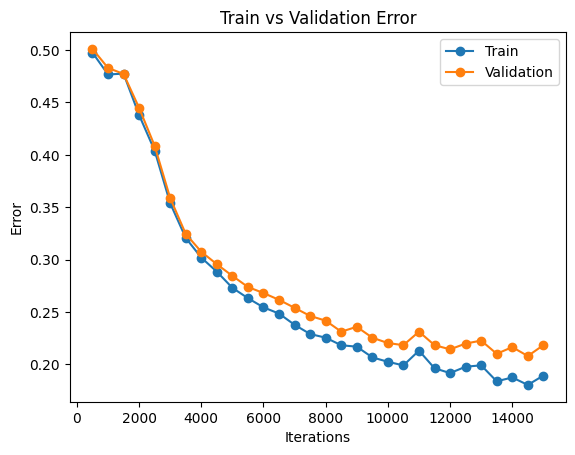

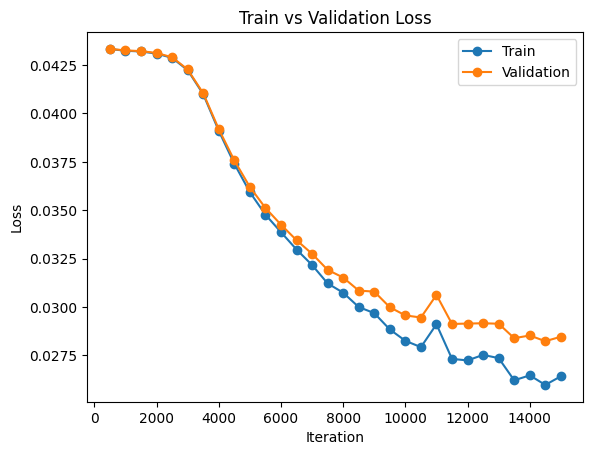

In [ ]:
rnn_config = set_rnn_config(embedding_dim=4, hidden_dim=4, pooling='max', num_layers = 1, rnn_type="LSTM")
best_model = train_RNN(train_loader, valid_loader, rnn_config, epochs=10)

### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters.
You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

Step by Step Tuning:

Step 1: Model Type → Find best between RNN, GRU, LSTM

Step 2: Pooling → Adjust pooling strategy

Step 3: Layer → Layer Count

Step 3: Model Size → Tune embedding + hidden dim

In [ ]:
# TO BE COMPLETED

# Tune the model type first
model_type = ["GRU", "RNN", "LSTM"]
best_model_type = None
best_valid_accuracy = 0

# Fixed other hyperparameters
rnn_config = set_rnn_config(embedding_dim=4, hidden_dim=4, pooling='max', num_layers = 1)

for m in model_type:
  rnn_config['rnn_type'] = m
  model = SentimentRNN(vocab_size = len(stoi)+1, **rnn_config)
  print(f"Training model with {m}...")
  model = train_RNN(train_loader, valid_loader, rnn_config, epochs=1, plot=False, log=False)
  valid_accuracy = get_accuracy(model, valid_loader)
  print(f"Validation accuracy for {m}: {valid_accuracy:.4f}\n")
  if valid_accuracy > best_valid_accuracy:
    best_valid_accuracy = valid_accuracy
    best_model_type = m

print(f"Best model type: {best_model_type} with validation accuracy {best_valid_accuracy:.4f}")

Training model with GRU...
GPU is used
Best model saved at iteration 1500 with validation accuracy 0.6689
Validation accuracy for GRU: 0.6689

Training model with RNN...
GPU is used
Best model saved at iteration 1500 with validation accuracy 0.6109
Validation accuracy for RNN: 0.6109

Training model with LSTM...
GPU is used
Best model saved at iteration 1500 with validation accuracy 0.5586
Validation accuracy for LSTM: 0.5586

Best model type: GRU with validation accuracy 0.6689


In [ ]:
# Step 2: Find the best Pooling method with Best Model Type (LSTM)
pooling_methods = ['max', 'concat']
best_pooling_method = None
best_valid_accuracy = 0

# Fixed other hyperparameters
rnn_config = set_rnn_config(embedding_dim=4, hidden_dim=4, pooling='max', num_layers = 1, rnn_type=best_model_type)

for p in pooling_methods:
  rnn_config['pooling'] = p
  model = SentimentRNN(vocab_size = len(stoi)+1, **rnn_config)
  print(f"Training model with {p} pooling...")
  model = train_RNN(train_loader, valid_loader, rnn_config, epochs=1, plot=False, log=False)
  valid_accuracy = get_accuracy(model, valid_loader)
  print(f"Validation accuracy for {p} pooling: {valid_accuracy:.4f}\n")
  if valid_accuracy > best_valid_accuracy:
    best_valid_accuracy = valid_accuracy
    best_pooling_method = p
    best_model = model

print(f"Best pooling method: {best_pooling_method} with validation accuracy {best_valid_accuracy:.4f}")

Training model with max pooling...
GPU is used
Best model saved at iteration 1500 with validation accuracy 0.6239
Validation accuracy for max pooling: 0.6239

Training model with concat pooling...
GPU is used
Best model saved at iteration 1500 with validation accuracy 0.6145
Validation accuracy for concat pooling: 0.6145

Best pooling method: max with validation accuracy 0.6239


In [ ]:
# Step 3: Find the best Number of Layers with fixed Best model type (LSTM) and best pooling method (Max)
num_layers = [1,2]
best_num_layers = None
best_valid_accuracy = 0

# Fixed other hyperparameters
rnn_config = set_rnn_config(embedding_dim=4, hidden_dim=4, pooling = best_pooling_method, rnn_type=best_model_type)

for n in num_layers:
  rnn_config['num_layers'] = n
  model = SentimentRNN(vocab_size = len(stoi)+1, **rnn_config)
  print(f"Training model with {n} layers...")
  model = train_RNN(train_loader, valid_loader, rnn_config, epochs=1, plot=False, log=False)
  valid_accuracy = get_accuracy(model, valid_loader)
  print(f"Validation accuracy for {n} layers: {valid_accuracy:.4f}\n")
  if valid_accuracy > best_valid_accuracy:
    best_valid_accuracy = valid_accuracy
    best_num_layers = n
    best_model = model

print(f"Best Number of Layers: {best_num_layers} with validation accuracy {best_valid_accuracy}")

Training model with 1 layers...
GPU is used
Best model saved at iteration 1500 with validation accuracy 0.5964
Validation accuracy for 1 layers: 0.5964

Training model with 2 layers...
GPU is used
Best model saved at iteration 1500 with validation accuracy 0.6009
Validation accuracy for 2 layers: 0.6009

Best Number of Layers: 2 with validation accuracy 0.600875


In [ ]:
# Step 4: Find the best embedding dimension and hidden dimension with other configuration fixed

# Define search space
embedding_dims = [10, 20, 50]
hidden_dims = [32, 50, 100]

best_embedding_dim = None
best_hidden_dim = None
best_valid_accuracy = 0

# Fixed other hyperparameters
rnn_config = set_rnn_config(embedding_dim=4, hidden_dim=4, pooling = best_pooling_method, rnn_type=best_model_type, num_layers=best_num_layers)

for e in embedding_dims:
  for h in hidden_dims:
    rnn_config['embedding_dim'] = e
    rnn_config['hidden_dim'] = h
    model = SentimentRNN(vocab_size = len(stoi)+1, **rnn_config)
    print(f'Training with embedding dim {e} and hidden dim {h}...')
    model = train_RNN(train_loader, valid_loader, rnn_config, epochs=1, plot=False, log=False)
    valid_accuracy = get_accuracy(model, valid_loader)
    print(f'Validation accuracy for embedding dim {e} and hidden dim {h}: {valid_accuracy:.4f}\n')
    if valid_accuracy > best_valid_accuracy:
      best_valid_accuracy = valid_accuracy
      best_embedding_dim = e
      best_hidden_dim = h
      best_model = model

print(f'Best embedding dim: {best_embedding_dim}, Best hidden dim: {best_hidden_dim} with validation accuracy {best_valid_accuracy:.4f}')


Training with embedding dim 10 and hidden dim 32...
GPU is used
Best model saved at iteration 1500 with validation accuracy 0.7650
Validation accuracy for embedding dim 10 and hidden dim 32: 0.7650

Training with embedding dim 10 and hidden dim 50...
GPU is used
Best model saved at iteration 1500 with validation accuracy 0.7652
Validation accuracy for embedding dim 10 and hidden dim 50: 0.7652

Training with embedding dim 10 and hidden dim 100...
GPU is used
Best model saved at iteration 1500 with validation accuracy 0.7602
Validation accuracy for embedding dim 10 and hidden dim 100: 0.7602

Training with embedding dim 20 and hidden dim 32...
GPU is used
Best model saved at iteration 1500 with validation accuracy 0.7869
Validation accuracy for embedding dim 20 and hidden dim 32: 0.7869

Training with embedding dim 20 and hidden dim 50...
GPU is used
Best model saved at iteration 1500 with validation accuracy 0.8050
Validation accuracy for embedding dim 20 and hidden dim 50: 0.8050

Tra

GPU is used
Epochs [1/10] Iteration [500] → Train err: 0.2484, Train loss: 0.0322 | Validation err: 0.2567, Val loss: 0.0331
Epochs [1/10] Iteration [1000] → Train err: 0.1728, Train loss: 0.0240 | Validation err: 0.1901, Val loss: 0.0257
Epochs [1/10] Iteration [1500] → Train err: 0.1596, Train loss: 0.0225 | Validation err: 0.1809, Val loss: 0.0244
Epochs [2/10] Iteration [2000] → Train err: 0.1460, Train loss: 0.0208 | Validation err: 0.1725, Val loss: 0.0233
Epochs [2/10] Iteration [2500] → Train err: 0.1377, Train loss: 0.0203 | Validation err: 0.1665, Val loss: 0.0231
Epochs [2/10] Iteration [3000] → Train err: 0.1497, Train loss: 0.0208 | Validation err: 0.1792, Val loss: 0.0246
Epochs [3/10] Iteration [3500] → Train err: 0.1201, Train loss: 0.0180 | Validation err: 0.1594, Val loss: 0.0222
Epochs [3/10] Iteration [4000] → Train err: 0.1195, Train loss: 0.0179 | Validation err: 0.1648, Val loss: 0.0234
Epochs [3/10] Iteration [4500] → Train err: 0.1118, Train loss: 0.0166 | Vali

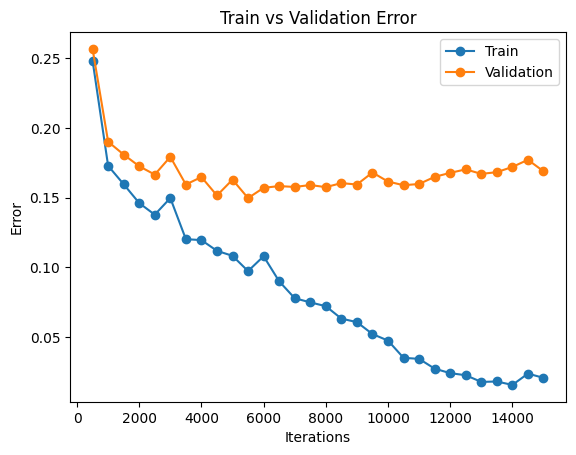

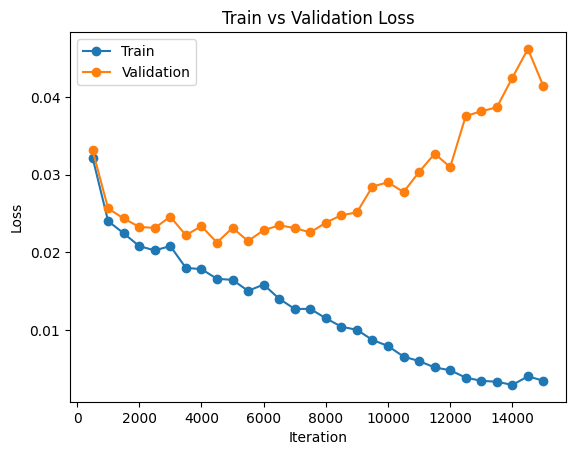

Final validation accuracy: 0.8504


In [ ]:
# Train more epochs with the best configurations
rnn_config = set_rnn_config(embedding_dim=50, hidden_dim=100, pooling = 'max', rnn_type='GRU', num_layers=2)
model = SentimentRNN(vocab_size = len(stoi)+1, **rnn_config)
model = train_RNN(train_loader, valid_loader, rnn_config, epochs=10, log=True, plot=True)
valid_accuracy = get_accuracy(model, valid_loader)
print(f'Final validation accuracy: {valid_accuracy:.4f}')


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Conducted a step-by-step hyperparameter tuning process, sequentially refining model type, pooling strategy, layer count, and model size (Embedding and Hidden Dimension).

Step 1: Model Type Selection

- Evaluated RNN, GRU, and LSTM.

Step 2: Pooling Strategy

- Compared max pooling and concatenation (max + mean).

- Max pooling provided better generalization.

Step 3: Number of Layers

- Tested single-layer vs. multi-layer architectures.

- Single-layer models showed superior performance without overfitting.

Step 4: Model Size (Embedding & Hidden Dimension)

- Tuned embedding dimension and hidden dimension.

- Best combination: Embedding Dim = 50, Hidden Dim = 100.

Final Configuration:

- Model Type: GRU

- Pooling Method: Max Pooling

- Layers: 1

- Embedding Dimension: 50

- Hidden Dimension: 100

Final Validation Accuracy: 0.8449

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nConducted a step-by-step hyperparameter tuning process, sequentially refining model type, pooling strategy, layer count, and model size (Embedding and Hidden Dimension).\n\nStep 1: Model Type Selection\n\n- Evaluated RNN, GRU, and LSTM.\n\nStep 2: Pooling Strategy\n\n- Compared max pooling and concatenation (max + mean).\n\n- Max pooling provided better generalization.\n\nStep 3: Number of Layers\n\n- Tested single-layer vs. multi-layer architectures.\n\n- Single-layer models showed superior performance without overfitting.\n\nStep 4: Model Size (Embedding & Hidden Dimension)\n\n- Tuned embedding dimension and hidden dimension.\n\n- Best combination: Embedding Dim = 50, Hidden Dim = 100.\n\nFinal Configuration:\n\n- Model Type: GRU\n\n- Pooling Method: Max Pooling\n\n- Layers: 1\n\n- Embedding Dimension: 50\n\n- Hidden Dimension: 100\n\nFinal Validation Accuracy: 0.8528\n\n'

## Part 4. Evaluation [10 pt]

**Important**. At this point in the assignment your test data should not have been evaluated by any of your models. The test data should be evaluated only after you have finished all the previous parts of the assignment. Once you evaluate your models on the test data you cannot change your models or else you may make hyperparameter adjustments that could lead to overfitting to the test data.

### Part (i) [3pt RESULT]

Report the final test accuracy of your model. Comment on how the result compares with accuracy obtained on the training and validation data. Are the results what you expected? Explain.

In [ ]:
# TO BE COMPLETED

test_accuracy = get_accuracy(model, test_loader)
valid_accuracy = get_accuracy(model, valid_loader)
train_accuracy = get_accuracy(model, train_loader)

print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Validation accuracy: {valid_accuracy:.4f}')
print(f'Train accuracy: {train_accuracy:.4f}')



Test accuracy: 0.8566
Validation accuracy: 0.8449
Train accuracy: 0.8932


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The test accuracy is slightly higher than the validation accuracy, indicating that the model generalizes well to unseen data.

The train accuracy is higher than both validation and test accuracy, suggesting mild overfitting, but not excessive.

The small gap between train and validation/test accuracy indicates a well-regularized model.

The results are as expected since we tuned hyperparameters to prevent extreme overfitting while maintaining high generalization performance.

'''


### Part (ii) [3pt DISCUSSION]

Look over the misclassified samples in the test data and see if you can find any patterns on where the model has difficulty with identifying the review sentiment. Provide up to 5 examples of positive and negative reviews each to support your findings.

In [ ]:
stoi = get_stoi(X_train)

# Create itos (index-to-string dictionary)
itos = {idx: word for word, idx in stoi.items()}

<built-in method get of Counter object at 0x7aca95d53410>


In [ ]:
def decode_text(encoded_data, itos):
    """
    Convert encoded data back to text using the itos (index-to-string) dictionary.
    """
    decoded_sentences = []

    for review in encoded_data:
        if isinstance(review, np.ndarray):  # Convert NumPy arrays to lists
            review = review.tolist()

        words = [itos[idx] for idx in review if idx in itos and idx != 0]  # Ignore padding (idx=0)
        decoded_sentences.append(" ".join(words))

    return decoded_sentences


In [ ]:
misclassified_samples = []

misclassified_positive = []  # Where true label is positive but classified incorrectly
misclassified_negative = []  # Where true label is negative but classified incorrectly



# Ensure model is in evaluation mode
model.eval()

# Iterate through test dataset
with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)

        # Get model predictions
        outputs = model(data)
        _, predicted = torch.max(outputs, dim=1)

        # Identify misclassified samples
        misclassified_indices = (predicted != labels).nonzero(as_tuple=True)[0]
        for idx in misclassified_indices:
            misclassified_samples.append((data[idx].cpu().numpy(), labels[idx].item(), predicted[idx].item()))

misclassified_positive = []  # Where true label is positive but classified incorrectly
misclassified_negative = []  # Where true label is negative but classified incorrectly

for sample, true_label, pred_label in misclassified_samples:
    decoded_text = decode_text([sample.tolist()], itos)[0]  # Convert encoded text back to words

    if true_label == 1 and pred_label == 0:  # Misclassified positive review
        misclassified_positive.append(decoded_text)
    elif true_label == 0 and pred_label == 1:  # Misclassified negative review
        misclassified_negative.append(decoded_text)

    # Stop when we have 5 samples each
    if len(misclassified_positive) >= 5 and len(misclassified_negative) >= 5:
        break


print("\n 5 Misclassified Positive Reviews (Classified as Negative):")
for i, review in enumerate(misclassified_positive[:5]):
    print(f" -  Example {i+1}: {review}\n")

print("\n 5 Misclassified Negative Reviews (Classified as Positive):")
for i, review in enumerate(misclassified_negative[:5]):
    print(f" -  Example {i+1}: {review}\n")



 5 Misclassified Positive Reviews (Classified as Negative):
 -  Example 1: movie actually funny like rest hour go watch called dont expect jokes movie enjoy two funny movie watch company friends especially youre still pretty hot movie piece art movie supposed light funny one thing think girls appreciate like movie guy definitely

 -  Example 2: quite predictable film turned quite big stars plain fun crap nice get surprise little film bill

 -  Example 3: movie completely quite simply let find funny laugh people might find goes far certainly everyone im need something really really stupid laugh forget dark weird br completely

 -  Example 4: funny movie theres lot ok plot bit original trying get even around almost older boy could funny plus typical movie first remake ive seen better original problem another actor would perfect plays way another problem women thats believable better looking come

 -  Example 5: thing old black white movies kind movies especially movie dvd using idea oh 

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Misclasified Positive Reviews (Classified as Negative)
- Many positive reviews contain naunced humor, sarcasm, or indirect praise (Ex. "Movie actually funny like rest")
- Reviews with mixed sentiment or references to negative elements before positive statements (Ex. "Quite predictable film turned out fun")
- Some reviews discuss old movies or remakes, which might confuse the model if it associates such references with negative sentiment

Misclassified Negative Reviews (Classified as Positive)
- Some negative reviews contain neutral or positive-seeming words (e.g., “film would characters first voice star”).
- Presence of technical analysis or descriptions of filmmaking aspects (e.g., “visual br early first couple features”), which may appear objective rather than overtly negative.
- The word “br” (artifact from text processing) might introduce noise, making the reviews harder to classify accurately.
'''


'\nPROVIDE YOUR ANSWER BELOW\n\nMisclasified Positive Reviews (Classified as Negative)\n- Many positive reviews contain naunced humor, sarcasm, or indirect praise (Ex. "Movie actually funny like rest")\n- Reviews with mixed sentiment or references to negative elements before positive statements (Ex. "Quite predictable film turned out fun")\n- Some reviews discuss old movies or remakes, which might confuse the model if it associates such references with negative sentiment\n\nMisclassified Negative Reviews (Classified as Positive)\n- Some negative reviews contain neutral or positive-seeming words (e.g., “film would characters first voice star”).\n- Presence of technical analysis or descriptions of filmmaking aspects (e.g., “visual br early first couple features”), which may appear objective rather than overtly negative.\n- The word “br” (artifact from text processing) might introduce noise, making the reviews harder to classify accurately.\n'

### Part (iii) [2pt RESULT]

What is your model's prediction of the **probability** that
the review message provided below is a positive review?

Hint: You will need to apply the same processing on the review as was done on the the train, val, and test data sets.

In [ ]:
review = """ Man.... I wish I loved this movie more than I did. Don't get me wrong,
it's a solid action movie with jaw-dropping stunts (some of the best in the series),
but as a Mission: Impossible movie, it felt like a small step backward for the franchise.
Fallout had mind-blowing action sequences and stunt work, along with developing Ethan's
relationship with Ilsa, providing closure with Julia, showing the lengths Ethan would
go to protect those closest to him, and battling an imposing villain. Dead Reckoning:
Part One stretches the movie across two films only to seemingly showcase action
spectacle after action spectacle while sacrificing character development.
Characters I have grown to love over a decade of films felt sidelined, ignored,
or wasted. Hayley Atwell's new character chewed up most of the screen time, and
while she was fantastic, I wanted to see more of the original team. The new villain
had an inconsistent ability that confused more than intimidated. There were some
important emotional moments that I just didn't feel the weight of when I definitely
should have. Part Two might tie everything together and make me enjoy Part One
more in retrospect, but unfortunately, I left wanting more from this one. """



In [ ]:
# TO BE COMPLETED


# Preprocess data
review_encoded = [stoi[word] for word in preprocess_sentence(review) if word in stoi.keys()]

# Apply padding
review_padded = padding_([review_encoded], 500)

# Convert to tensor and move to device
review_tensor = torch.tensor(review_padded, dtype=torch.long).to(device)
review_tensor.unsqueeze(0)

# Inference
model.eval()
with torch.no_grad():
    output = model(review_tensor)
    probabilities = torch.softmax(output, dim=1)

print(f"Probability of positive review: {probabilities[0][1].item():.4f}")




Probability of positive review: 0.5852


### Part (iv) [2pt DISCUSSION]

Do you think that detecting positive and negative reviews is an easy or difficult task?

Since machine learning models are expensive to train and deploy, it is very
important to compare our models against baseline models: a simple
model that is easy to build and inexpensive to run that we can compare our
recurrent neural network model against.

Explain how you might build a simple baseline model. This baseline model
can be a simple neural network (with very few weights), a hand-written algorithm,
or any other strategy that is easy to build and test.

**Do not actually build a baseline model. Instead, provide instructions on
how to build it.**

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

A simple Neural Network with a Single Dense Layer can do the job.

Preprocessing:
- Convert words into numerical representations

Model Architecture:
- Input Layer: Vector representation of the text
- Hidden Layer: Single Dense Layer with ReLU Activation
- Ouput Layer: Single Neuron with sigmoid activatino for binary classification

Training:
- Train using Cross-Entropy Loss with Adam Optimizer.


Justification:
- This shallow neural network is computationally inexpensive and easy to train.
- While it lacks the sequential modeling ability of RNNs or LSTMs, it provides a reasonable benchmark to evaluate whether more complex models justify their computational cost.
- It sets a baseline for accuracy—if a complex RNN-based model doesn’t outperform this, it suggests either a data issue or an unnecessary level of complexity.
'''

'\nPROVIDE YOUR ANSWER BELOW\n\nA simple Neural Network with a Single Dense Layer can do the job.\n\nPreprocessing:\n- Convert words into numerical representations\n\nModel Architecture:\n- Input Layer: Vector representation of the text\n- Hidden Layer: Single Dense Layer with ReLU Activation\n- Ouput Layer: Single Neuron with sigmoid activatino for binary classification\n\nTraining:\n- Train using Cross-Entropy Loss with Adam Optimizer.\n\n\nJustification:\n- This shallow neural network is computationally inexpensive and easy to train.\n- While it lacks the sequential modeling ability of RNNs or LSTMs, it provides a reasonable benchmark to evaluate whether more complex models justify their computational cost.\n- It sets a baseline for accuracy—if a complex RNN-based model doesn’t outperform this, it suggests either a data issue or an unnecessary level of complexity.\n'

# PART B - Transfer Learning

For many natural language processing tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to enormous compute requirements and lack of sufficient amounts of training data. Instead, you should always try to take advantage of an existing model that performs similar tasks as the one you need to solve.

In this part of the assignment we will be using pretrained models to improve the performance on identifying positive and negative reviews. There are several pretrained models that are available to us, here we will use a pretrained BERT model that comes with the hugging face transformer library.

Provided below is sample code to get you started. For more details please visit the hugging face tutorial on using pretrained models using PyTorch: https://huggingface.co/docs/transformers/training

#### Sample Code

In [ ]:
# install relevant libraries
!pip install -qq transformers

In [ ]:
# load relevant libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

PRE_TRAINED_MODEL_NAME = 'bert-base-cased' #Specify which BERT model to use

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME) #Tokenizer for BERT
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME) #The pre-trained BERT model from Hugging Face

################### SUBMISSION NOTE ####################################
#  - output of this cell creates issues for converting ipynb to HTML
#  - you may want to delete this output when you are ready to submit

In [ ]:
# This cell demonstartes how to tokenize a sentence using a pre-trained BERT tokenizer

sample_txt = 'I want to learn how to do sentiment analysis using BERT and tokenizer.'

encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32, #Ensures the sentence has at most 32 tokens
  add_special_tokens=True, # Add '[CLS]' and '[SEP]' # [CLS]: Start Token; [SEP]: End Token
  return_token_type_ids=False, #Since working with a single sentence, token type IDs are not needed
  pad_to_max_length=True, #Ensure all inputs are the same length by padding shorter ones
  return_attention_mask=True, #Returns a tensor indicating which tokens are real (1) and which are padding (0)
  return_tensors='pt',  # Return PyTorch tensors
  truncation = True #Truncates the sentence if it's too long
)

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# This returns the numerical representatinos of the words in sample txt
encoding['input_ids']

# 101: [CLS] token at the beginning
# 102: [SEP] toekn at the end
# 0: Padding tokens to match `max_length=32`

tensor([[  101,   146,  1328,  1106,  3858,  1293,  1106,  1202, 17024,  3622,
          1606,   139,  9637,  1942,  1105, 22559, 17260,   119,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]])

In [ ]:
# 1s: Indicate actual tokens
# 0s: Indicate padding (Ignored by BERT)
encoding['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# Visualize what BERT model output
sample_output = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'],
                           output_hidden_states=True)
sample_output.keys()

odict_keys(['last_hidden_state', 'pooler_output', 'hidden_states'])

In [ ]:
# Input_ids: Tokenzied words
# Attetion_mask: Ensures BERT ignores padding
# [0]: Extacts the last hidden states, which contain context-aware word embeddings
# Hidden state in Transformer means "Word representatino from the transformer layer"
hidden_states = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[0]

# Extracts the pooled output, which is the representation of the [CLS] token
# Often used for classification tasks (Sentiment Analysis)
# [CLS] otken is not simply "Start token" but also acts as a summary of the entire sentence after multiple transformer layer
pooled_output = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[1]

In [ ]:
hidden_size = bert_model.config.hidden_size

print(hidden_size)
print(hidden_states.shape)
print(pooled_output.shape)


768
torch.Size([1, 32, 768])
torch.Size([1, 768])


In the sample code provided we loaded a short text sequence, tokenized it using the same tokenization that was used in the pretrained BERT model, and fed the tokenized input into the BERT model to obtain the embeddings.

The model output consists of two forms of embeddings:
- **hidden_states** are the final layer of outputs that has a shape sequence_length x embeddings, much like the hidden states of a recurrent neural network
- **pooled_output** is the result of applying max pooling on the hidden states to effectively collapse the sequence dimenension and ensure the same output size for any given sequence before feeding into the classification stage

Note that we preprocess all of the data prior to training a classifier stage for sentiment analysis to help speed up the training process. This is no different from the process we applied in an earlier assignment using AlexNet and image data.

## Part 1. Data Loading [5 pt]

We will be using the same "IMDB Movie Review Dataset" that we used earlier. Reload the data and complete Part B of the assignment. You should be able to complete part B independently from Part A.

### Part (i) [1pt EXPLORATORY]

Provided below is a DataLoader for your training and test datasets so you can iterate over batches of data. Run the DataLoader to create your training, validation, and test data.

In [ ]:
from torch.utils.data import Dataset, DataLoader

class MovieReviewDataset(Dataset):
    def __init__(
        self,
        reviews,
        targets,
        tokenizer,
        max_len,
        bert_model=None,
        embed_folder='embeddings',
        precompute=True
    ):
        """
        reviews     : array/list of text data
        targets     : array/list of 'positive'/'negative' labels
        tokenizer   : BERT tokenizer
        max_len     : maximum sequence length for tokenization
        bert_model  : a BERT model for generating embeddings (if precompute=True)
        embed_folder: folder to store .pt files of precomputed embeddings
        precompute  : True -> generate & save embeddings, False -> load from disk only
        """
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.bert_model = bert_model
        self.embed_folder = embed_folder
        self.precompute = precompute

        # Create the folder if it doesn't exist
        if not os.path.exists(self.embed_folder):
            os.makedirs(self.embed_folder)

        if self.precompute and (self.bert_model is not None):
            self._precompute_embeddings()

    def __len__(self): #this is needed since the parent class is Dataset
        return len(self.reviews)

    def __getitem__(self, idx): #This is needed since the parent class is Dataset
        """
        Returns a dictionary with:
          - 'review_text'   : original text (optional, for reference)
          - 'pooled_output' : [768]-dim embedding from BERT
          - 'last_hidden'   : [seq_len, 768] from the last hidden layer
          - 'targets'       : 0 or 1
        """
        review = str(self.reviews[idx])
        target = 1 if self.targets[idx] == 'positive' else 0

        embed_path = os.path.join(self.embed_folder, f'embedding_{idx}.pt')
        # Load precomputed embeddings
        embedding_dict = torch.load(embed_path)

        return {
            'review_text': review,
            'pooled_output': embedding_dict['pooled'],
            'last_hidden': embedding_dict['last'],
            'targets': torch.tensor(target, dtype=torch.long)
        }


    def _precompute_embeddings(self, batch_size=256, device="cuda"):
        """
        Precompute embeddings in batches rather than one by one.
        """
        # Move the model to device (CPU/GPU)
        self.bert_model = self.bert_model.to(device)
        self.bert_model.eval()

        print("Precomputing BERT embeddings (batched)...")

        # 1) Tokenize everything
        encodings = [self.tokenizer.encode_plus(
            str(review),
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        ) for review in self.reviews]
        input_ids = torch.cat([e['input_ids'] for e in encodings], dim=0)
        attention_masks = torch.cat([e['attention_mask'] for e in encodings], dim=0)

        # 2) Create a TensorDataset and DataLoader
        dataset_tensors = TensorDataset(input_ids, attention_masks)
        dataloader = DataLoader(dataset_tensors, batch_size=batch_size, shuffle=False)

        # We'll need to index back into `self.reviews` to save each sample’s .pt
        idx_offset = 0 #Keep track of the review index when saving embeddings

        for batch in tqdm(dataloader, total=len(dataloader)):
            input_ids, attention_mask = [t.to(device) for t in batch] #[input_ids, attention_mask]

            with torch.no_grad():
                outputs = self.bert_model( # Compute BERT Embeddings
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    output_hidden_states=True #This makes BERT return hidden states
                )
            # outputs.pooler_output.shape is [batch_size, hidden_dim]
            # outputs.hidden_states[-1].shape is [batch_size, seq_len, hidden_dim]

            pooled_output_batch = outputs.pooler_output.detach().cpu()
            last_hidden_batch = outputs.hidden_states[-1].detach().cpu()

            # 3) Save each sample in the batch
            for i in range(len(input_ids)):
                sample_idx = idx_offset + i
                embed_path = os.path.join(self.embed_folder, f'embedding_{sample_idx}.pt')

                # Skip if already exists (optional check)
                if os.path.isfile(embed_path):
                    continue

                embedding_dict = {
                    'pooled': pooled_output_batch[i].detach().cpu().clone(),
                    'last': last_hidden_batch[i].detach().cpu().clone()
                }

                torch.save(embedding_dict, embed_path)

            idx_offset += len(input_ids)

        print("Done precomputing embeddings.")


In [ ]:
# load dataset
df = pd.read_csv("IMDB Dataset.csv")

# process into data and labels
X = df['review'].values
y = df['sentiment'].values


# First split into train and temp (valid + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Then split temp into valid and test (each 20% of total)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# prepare data loaders
MAX_LEN = 400
BATCH_SIZE = 16

# Clean data and preprocess data for the Bert Input
df_train = pd.DataFrame({'review': X_train, 'sentiment': y_train})
df_valid = pd.DataFrame({'review': X_valid, 'sentiment': y_valid})
df_test = pd.DataFrame({'review': X_test, 'sentiment': y_test})

#training data
train_dataset = MovieReviewDataset(
    reviews=df_train['review'].values,
    targets=df_train['sentiment'].values,
    tokenizer=tokenizer,
    max_len=MAX_LEN,
    bert_model=bert_model,       # required if we want to precompute now
    embed_folder='train_embeds', # folder to save embeddings
    precompute=True              # set to True so we generate them
)

train_data_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    num_workers=0,
    pin_memory=True,
) #modify num_works as needed


#validation data

valid_dataset = MovieReviewDataset(
    reviews=df_valid['review'].values,
    targets=df_valid['sentiment'].values,
    tokenizer=tokenizer,
    max_len=MAX_LEN,
    bert_model=bert_model,       # required if we want to precompute now
    embed_folder='valid_embeds', # folder to save embeddings
    precompute=True              # set to True so we generate them
)

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=BATCH_SIZE,
    num_workers=0,
    pin_memory=True,
)

# TO BE COMPLETED

#test data

test_dataset = MovieReviewDataset(
    reviews=df_test['review'].values,
    targets=df_test['sentiment'].values,
    tokenizer=tokenizer,
    max_len=MAX_LEN,
    bert_model=bert_model,       # required if we want to precompute now
    embed_folder='test_embeds', # folder to save embeddings
    precompute=True              # set to True so we generate them
)
test_data_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=0,
    pin_memory=True,
)

Precomputing BERT embeddings (batched)...


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


  0%|          | 0/94 [00:00<?, ?it/s]

Done precomputing embeddings.
Precomputing BERT embeddings (batched)...


  0%|          | 0/32 [00:00<?, ?it/s]

Done precomputing embeddings.
Precomputing BERT embeddings (batched)...


  0%|          | 0/32 [00:00<?, ?it/s]

Done precomputing embeddings.


### Part (ii) [1pt EXPLORATORY]

Use the **train_data_loader** to load one sample. What are the different attributes provided with the sample and how are they used?

In [ ]:
# TO BE COMPLETED

# The dataloader batches the data and.
# When iterate through DataLoader, it checks the batch_size and prepares to retrieve 16 samples at a time
# Calls `__getitem__(idx) 16 times in parallel (using multiple workers)

# Load one batch from train_data_loader
sample_batch = next(iter(train_data_loader))

# Print the keys to see what attributes are in the dataset
print("Keys in the sample:", sample_batch.keys())

# Print the shapes of each attribute to understand their structure
for key, value in sample_batch.items():
    print(f"{key}: {value.shape if type(value) == torch.Tensor else value}")


Keys in the sample: dict_keys(['review_text', 'pooled_output', 'last_hidden', 'targets'])
review_text: ['The Young Victoria is a beautiful film and has presented Queen Victoria in a different light to what everyone thinks about her. The films wipes away the "I am not amused" impression of Queen Victoria and shows she was a cheerful young woman.<br /><br />As I love history, particularly Victorian history, you can imagine my reaction when i first saw this film advertised, i was so so so excited and counted down the days until it came to the cinemas. I was a little worried that it wouldn\'t be historically accurate, but it was and I loved it. I found out new facts about Queen Victoria that didn\'t know before and it interested me greatly.<br /><br />Queen Victoria in many lights was one of our all time greatest Monarchs, and this film paints a picture of her real personality and what her life was like. She was treated so badly by her mothers adviser Sir John Conroy, because he wanted Bri

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

We use `train_data_loader` to load one batch. The batch contains:

1. `review_text`: The original review text (not used in training).
2. `pooled_output`: The `[CLS]` token embedding (used as input to a classifier).
3. `last_hidden`: The final hidden states for all tokens (useful for advanced NLP tasks).
4. `targets`: The sentiment label (0 = negative, 1 = positive), used for training.

During training, `pooled_output` is passed into a classifier, and the `targets` are used to compute the loss

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nWe use `train_data_loader` to load one batch. The batch contains:\n\n1. `review_text`: The original review text (not used in training).\n2. `pooled_output`: The `[CLS]` token embedding (used as input to a classifier).\n3. `last_hidden`: The final hidden states for all tokens (useful for advanced NLP tasks).\n4. `targets`: The sentiment label (0 = negative, 1 = positive), used for training.\n\nDuring training, `pooled_output` is passed into a classifier, and the `targets` are used to compute the loss\n\n'

### Part (iii) [1pt EXPLORATORY]

Determine the range of values for the tokens in the training data. How are the tokens obtained?

Hint: You can apply your intuition here, or do some additional research to find how the "bert-base-cased" tokenization is done.

In [ ]:
# TO BE COMPLETE

# Tokenize every sample and calculate the min and max for each sample

all_training_tokens = []
for review in X_train:
    encoded = tokenizer.encode( review,
                                add_special_tokens=True,
                                max_length=400,
                                return_token_type_ids=False,
                                pad_to_max_length=True,
                                return_attention_mask=True,
                                # return_tensors='pt', # Remove for having output as list
                                truncation=True)
    all_training_tokens.extend(encoded)

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
all_training_tokens = np.array(all_training_tokens)
print("Min token value:", np.min(all_training_tokens))
print("Max token value:", np.max(all_training_tokens))

Min token value: 0
Max token value: 28466


In [ ]:
# Intuition: Check the official vocabulary size
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
print(f"Vocabular size: {tokenizer.vocab_size}")

min_special_token_id = np.inf
min_special_token = ""
for token_name, token in tokenizer.special_tokens_map.items():
  id = tokenizer.convert_tokens_to_ids(token)
  if id<min_special_token_id:
    min_special_token_id = id
    min_special_token = token_name

print(f"Special Token with Minimum Token ID: {min_special_token} ({min_special_token_id})")

Vocabular size: 28996
Special Token with Minimum Token ID: pad_token (0)


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Computed Answer:
By using the BERT-Base-Cased tokenizer, we tokenized every sample in the training data and observed:
- Minimum token ID: 100
- Maximum token ID: 28466

This means that the training data contains tokenized words that fall within this range.

---

Intuition:
- The total vocabulary size of the tokenizer is 28,996, meaning the maximum possible token ID should not exceed this number.
- By analyzing the special tokens, we found that the lowest token ID is 0, which corresponds to the [PAD] token.
- Since our computed token range falls within the expected limits of the tokenizer’s vocabulary, this confirms that our tokenization process is working as intended.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\nComputed Answer:\nBy using the BERT-Base-Cased tokenizer, we tokenized every sample in the training data and observed:\n- Minimum token ID: 100\n- Maximum token ID: 28466\n\nThis means that the training data contains tokenized words that fall within this range.\n\n---\n\nIntuition:\n- The total vocabulary size of the tokenizer is 28,996, meaning the maximum possible token ID should not exceed this number.\n- By analyzing the special tokens, we found that the lowest token ID is 0, which corresponds to the [PAD] token.\n- Since our computed token range falls within the expected limits of the tokenizer’s vocabulary, this confirms that our tokenization process is working as intended.\n\n\n'

### Part (iv) [1pt EXPLORATORY]

Generate histograms of all the token values in the training data. Repeat for the validation and test data. What are the top 5 occuring tokens in the training_dataset? What do these tokens represent?

In [ ]:
# TO BE COMPLETED

# Tokenize every sample and calculate the min and max for each sample

all_valid_tokens = []
for review in X_valid:
  encoded = tokenizer.encode( review,
                              add_special_tokens=True,
                              max_length=400,
                              return_token_type_ids=False,
                              pad_to_max_length=True,
                              return_attention_mask=True,
                              truncation=True)
  all_valid_tokens.extend(encoded)

all_test_tokens = []
for review in X_test:
  encoded = tokenizer.encode( review,
                              add_special_tokens=True,
                              max_length=400,
                              return_token_type_ids=False,
                              pad_to_max_length=True,
                              return_attention_mask=True,
                              truncation=True)
  all_test_tokens.extend(encoded)



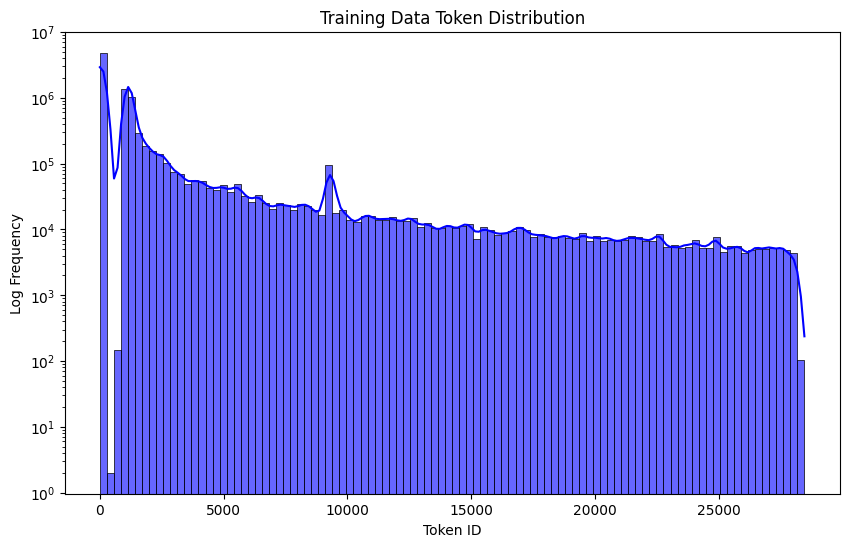

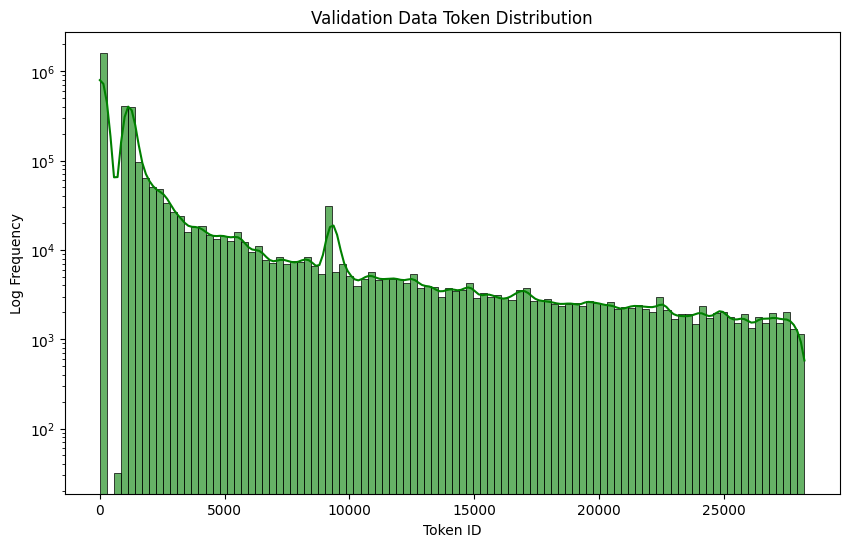

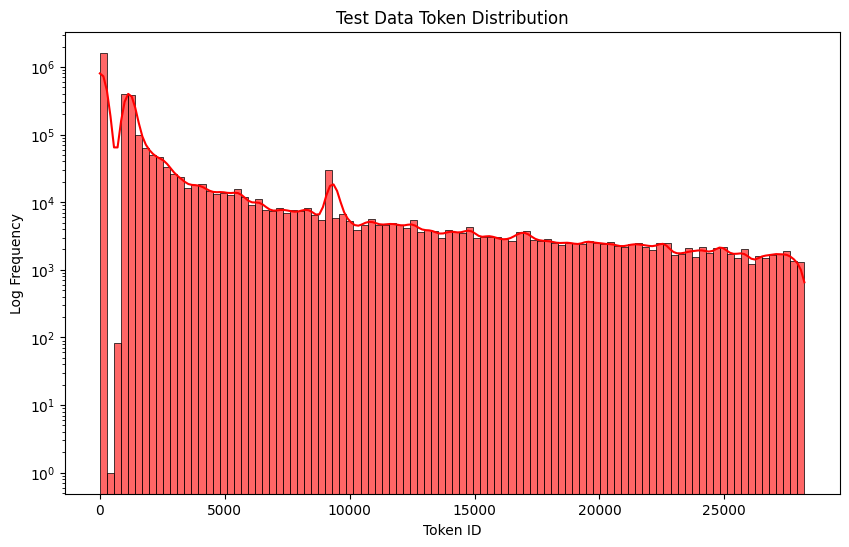

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to plot each dataset separately
def plot_token_distribution(token_list, title, color):
    plt.figure(figsize=(10, 6))
    sns.histplot(token_list, bins=100, color=color, alpha=0.6, kde=True)

    plt.yscale("log")  # Log scale to make distribution clearer
    plt.xlabel("Token ID")
    plt.ylabel("Log Frequency")
    plt.title(title)
    plt.show()

# Plot each dataset separately
plot_token_distribution(all_training_tokens, "Training Data Token Distribution", "blue")
plot_token_distribution(all_valid_tokens, "Validation Data Token Distribution", "green")
plot_token_distribution(all_test_tokens, "Test Data Token Distribution", "red")


In [ ]:
# Find the top 5 most common words for train, valid, test
train_token_counts = Counter(all_training_tokens)
valid_token_counts = Counter(all_valid_tokens)
test_token_counts = Counter(all_test_tokens)

# Get top 5 most common tokens
train_top_tokens = train_token_counts.most_common(5)
valid_top_tokens = valid_token_counts.most_common(5)
test_top_tokens = test_token_counts.most_common(5)

# Convert token IDs back to words
train_top_words = [tokenizer.convert_ids_to_tokens(int(t)) for t, _ in train_top_tokens]
valid_top_words = [tokenizer.convert_ids_to_tokens(int(t)) for t, _ in valid_top_tokens]
test_top_words = [tokenizer.convert_ids_to_tokens(int(t)) for t, _ in test_top_tokens]

print(f"Top 5 tokens in training data: {train_top_words}")
print(f"Top 5 tokens in Validation Data: {valid_top_words}")
print(f"Top 5 tokens in Test Data: {test_top_words}")

Top 5 tokens in training data: ['[PAD]', '.', 'the', ',', 'a']
Top 5 tokens in Validation Data: ['[PAD]', '.', 'the', ',', 'a']
Top 5 tokens in Test Data: ['[PAD]', '.', 'the', ',', 'a']


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Token Distribution: Histograms show that most tokens have low indices, with a high frequency of [PAD] (ID = 0).

Most Common Tokens:

[PAD] is the most frequent token, confirming extensive padding in sequences.

Punctuation (".", ",") and stopwords ("the", "a") appear frequently.

Insights:

High frequency of [PAD] suggests shorter sentences in the dataset.

Common punctuation and stopwords indicate the need for preprocessing before further model training.

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nToken Distribution: Histograms show that most tokens have low indices, with a high frequency of [PAD] (ID = 0).\n\nMost Common Tokens:\n\n[PAD] is the most frequent token, confirming extensive padding in sequences.\n\nPunctuation (".", ",") and stopwords ("the", "a") appear frequently.\n\nInsights:\n\nHigh frequency of [PAD] suggests shorter sentences in the dataset.\n\nCommon punctuation and stopwords indicate the need for preprocessing before further model training.\n\n'

### Part (v) [1pt EXPLORATORY]

Select a single sample from your training DataLoader and feed it through the **bert_model** to obtain the hidden_states and pooled_output. Briefly describe what each tensor dimension represents and what affects the size of each dimension.

In [ ]:
# TO BE COMPLETED
single_sample_batch = next(iter(train_data_loader))

#Extract the output
pooled_output = sample_batch["pooled_output"]
last_hidden = sample_batch["last_hidden"]

print(f"Pooled Output Shape: {pooled_output.shape}")
print(f"Last Hidden Shape: {last_hidden.shape}")



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Pooled Output Shape: torch.Size([16, 768])
Last Hidden Shape: torch.Size([16, 400, 768])


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Pooled Output: (16, 768)
- 16: Batch Size
- 768: Hidden size of BERT's final [CLS] token representation
- Represents the sentence-level embedding derived from the [CLS] token, useful for classification tasks

Last Hidden State: (16, 400, 768)
- 16: Batch Size
- 400: Maximum sequence length (MAX_LEN)
- 768: Hidden size of BERT's final layer
- Represents contextualized embeddings for each token in the sequence, capturing meaning based on surrounding words


'''

"\nPROVIDE YOUR ANSWER BELOW\n\nPooled Output: (16, 768)\n- 16: Batch Size\n- 768: Hidden size of BERT's final [CLS] token representation\n- Represents the sentence-level embedding derived from the [CLS] token, useful for classification tasks\n\nLast Hidden State: (16, 400, 768)\n- 16: Batch Size\n- 400: Maximum sequence length (MAX_LEN)\n- 768: Hidden size of BERT's final layer\n- Represents contextualized embeddings for each token in the sequence, capturing meaning based on surrounding words\n\n\n"

## Part 2. Model Architecture [2 pt]

### Part (i) [1pt MODEL]

Prepare a review classifier model that builds on the pooled output from the Bert model to identify positive and negative reviews.


An example is provided below in `BaselineSentimentClassifierPooled`, which you can use for inspiration. However, you should build your own model.

In [ ]:
class BaselineSentimentClassifierPooled(nn.Module):
    def __init__(self, n_classes):
        super(BaselineSentimentClassifierPooled, self).__init__()
        self.linear = nn.Linear(768, n_classes)

    def forward(self, pooled_embedding):
        """
        pooled_embedding: shape [batch_size, 768]
        """
        outputs = self.linear(pooled_embedding)
        return outputs


In [ ]:
class SentimentClassifierPooled(nn.Module):

  def __init__(self, n_classes, hidden_neuron=512, dropout=0.3):
    super(SentimentClassifierPooled, self).__init__()
    # We don't need BERT here, since we have precomputed embeddings
    # TO BE COMPLETED
    self.linear1 = nn.Linear(768, hidden_neuron)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(dropout)
    self.linear2 = nn.Linear(hidden_neuron, int(hidden_neuron/2))
    self.linear3 = nn.Linear(int(hidden_neuron/2), n_classes)

  def forward(self, pooled_embedding):
    # TO BE COMPLETED
    x = self.linear1(pooled_embedding)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.linear2(x)
    x = self.relu(x)
    x = self.dropout(x)
    outputs = self.linear3(x)
    return outputs


### Part (ii) [1pt MODEL]

Construct the architecture for a review classifier model that uses the last hidden output from the Bert model to identify positive and negative reviews.

An example is provided below in `BaselineSentimentClassifierLast`, which you can use for inspiration . However, you should build your own model.


In [ ]:
class BaselineSentimentClassifierLast(nn.Module):
    def __init__(self, n_classes):
        super(BaselineSentimentClassifierLast, self).__init__()
        # Again, no BERT directly needed if using precomputed data
        self.linear = nn.Linear(768, n_classes)


    def forward(self, last_hidden):
        """
        last_hidden: shape [batch_size, seq_len, 768]
        We'll do a simple max-pool across seq_len dimension => shape [batch_size, 768]
        """
        # last_hidden has shape [B, T, 768]
        # we want max across T => shape [B, 768]
        x, _ = torch.max(last_hidden, dim=1)
        x = self.dropout(x)
        outputs = self.linear(x)
        return outputs


In [ ]:
class SentimentClassifierLast(nn.Module):

  def __init__(self, n_classes, hidden_neuron=256, dropout=0.3, num_layers=1):
    super(SentimentClassifierLast, self).__init__()

    # TO BE COMPLETED

    # Use LSTM since sequential input data

    # Having bidirectional process input both backward and forward, which is good for sentiment since it requires the whole context instead of only the past words.
    self.rnn = nn.GRU(768, hidden_neuron, num_layers=num_layers, bidirectional=True, batch_first=True) # Take the last hidden state
    self.fc = nn.Linear(hidden_neuron*2, n_classes)
    self.dropout = nn.Dropout(dropout)

  def forward(self, last_hidden):
    # TO BE COMPLETED
    outputs, hidden = self.rnn(last_hidden)

    # Use the last hidden state from the last hidden layer (Include both direction (Forward + Backward))
    out = outputs[:, -1, :]

    out = self.dropout(out)
    outputs = self.fc(out)

    return outputs

## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [ ]:
def get_accuracy(model, data_loader: DataLoader, model_type="pooled"):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """

    # TO BE COMPLETED
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)

    correct = 0
    total = 0
    model.eval()

    with torch.no_grad():
      for sample_batch in tqdm(data_loader, total=len(data_loader)):

        if model_type == "pooled":
          inputs = sample_batch["pooled_output"]
        elif model_type == "last":
          inputs = sample_batch["last_hidden"]

        labels = sample_batch["targets"]

        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return correct / total


### Part (ii) [1pt MODEL]

Write a function **train_model** to train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

Helper Function

In [ ]:
from torch.cuda.amp import autocast

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
use_Cuda = True

def set_sentiment_config(lr=0.001, epochs=5, model_type="pooled", hidden_neurons=512, dropout=0.3, num_layers = 1):
  return {
      "learning_rate": lr,
      "n_epochs": epochs,
      "hidden_neurons": hidden_neurons,
      "dropout": dropout,
      "model_type": model_type,
      "num_layers": num_layers
  }

def evaluate(model, criterion, data_loader, device = device, model_type="pooled"):
    print("Evaluating Validation Data")
    torch.cuda.empty_cache()  # Free up memory
    total_loss = 0.0
    total_correct = 0
    total_samples = 0

    model.eval()  # Set model to evaluation mode

    if  device == torch.device("cuda") and torch.cuda.is_available():
        print("Use GPU for Evaluation")
        model = model.to(device)  # Move model to GPU once

    with torch.inference_mode():  # Use inference_mode() to reduce the training time
        for sample_batch in tqdm(data_loader, total=len(data_loader)):
            # Extract the correct input type
            if model_type == "pooled":
                data = sample_batch["pooled_output"]
            elif model_type == "last":
                data = sample_batch["last_hidden"]

            labels = sample_batch["targets"]

            # Move tensors to GPU if needed
            if device == torch.device("cuda") and torch.cuda.is_available():
                data = data.to(device)
                labels = labels.to(device)

            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, labels)

            # Compute loss and accuracy
            _, predicted = torch.max(outputs, dim=1)
            total_samples += labels.shape[0]
            total_correct += torch.sum(predicted == labels)
            total_loss += loss.detach() * labels.shape[0]  # Weighted sum for batch loss

    # Compute average loss & accuracy
    avg_loss = total_loss.item() / total_samples
    avg_acc = total_correct.item() / total_samples

    return avg_acc, avg_loss


def get_model_name(sentiment_config: dict, epoch):
  '''
  rnn_config: dict containing the hyperparameters of the RNN model
      'embedding_dim': embedding_dim,
      'hidden_dim': hidden_dim,
      'num_layers': num_layers,
      'pooling': pooling

  returns: string with the model name
  '''
  parent_path = "/content/drive/Othercomputers/My laptop/Desktop/UofT/Term 2/MIE 1517/Assignment/Assignment 4/PartBCheckpoint/"
  name = f"SentimentClassifier_{sentiment_config['model_type']}_hidden_neurons_{sentiment_config['hidden_neurons']}_dropout_{sentiment_config['dropout']}_epoch_{epoch}"
  path = parent_path + name
  return path

Training Pipeline

In [ ]:
# TO BE COMPLETED

# Define the training pipeline
def train_model(train_loader, valid_loader, sentiment_config: dict, plot=True, log=True):

  learning_rate = sentiment_config["learning_rate"]
  n_epochs = sentiment_config["n_epochs"]
  model_type = sentiment_config["model_type"]
  hidden_neurons = sentiment_config["hidden_neurons"]
  dropout = sentiment_config["dropout"]
  num_layers = sentiment_config["num_layers"]

  # Define the model based on Pooled or Last Hidden
  if model_type == "pooled":
    model = SentimentClassifierPooled(n_classes=2, hidden_neuron=hidden_neurons, dropout=dropout)
  elif model_type == "last":
    model = SentimentClassifierLast(n_classes=2, hidden_neuron=hidden_neurons, dropout=dropout, num_layers=num_layers)

  # train_data_loader, valid_data_loader, test_data_loader
  criterion = nn.CrossEntropyLoss()

  # Adam
  optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay=1e-5)

  # Record the loss and accuracy in each epochs
  epochs, train_losses, val_losses, train_acc, val_acc = [],[],[],[],[]
  running_loss, correct, total =0.0, 0, 0

  # Move model to cuda
  if use_Cuda and torch.cuda.is_available():
    model.to(device)
    print("Training with GPU... \n")


  for epoch in range(n_epochs):
    print(f"EPOCH: {epoch+1}")

    torch.cuda.empty_cache()  # Free up memory
    model.train()

    for sample_batch in tqdm(train_loader, total=len(train_loader)):

      #Define input and targets
      if model_type == "pooled":
        data = sample_batch["pooled_output"]
      elif model_type == "last":
        data = sample_batch["last_hidden"]

      labels = sample_batch["targets"]

      #Enable GPU
      if use_Cuda and torch.cuda.is_available():
        data = data.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

      # Forward pass
      with torch.autocast(device_type="cuda"):
        outputs = model(data)
        loss = criterion(outputs, labels)

      # Backward Pass
      loss.backward()
      # Gradient Clipping
      torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
      optimizer.step()
      optimizer.zero_grad()
      torch.cuda.empty_cache()  # Free up memory

      # Tracking loss & Accuracy
      running_loss += loss.detach()*labels.shape[0]
      predicted_labels = torch.argmax(outputs, dim=1)
      correct += torch.sum(predicted_labels == labels).detach()
      total += labels.shape[0]

    # Saving Checkpoints for every epoch
    print(f"SAVING CHECKPOINT FOR CURRENT EPOCH: {epoch}")
    epochs.append(epoch)

    # Calculate accuracy and loss for validation and training
    val_accuracy, val_loss = evaluate(model, criterion, valid_loader, device=device, model_type=model_type)
    train_accuracy, train_loss = correct.cpu().item() / total, running_loss.cpu().item() / total

    # Save for plotting
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Checkpoint: Save the current model state
    model_path = get_model_name(sentiment_config, epoch)
    torch.save(model.state_dict(), model_path)

    if log:
      print(f"Epochs [{epoch+1}/{n_epochs}] → Train Acc: {train_acc[-1]:.4f}, Train loss: {train_losses[-1]:.4f} | "
              f"Validation Acc: {val_acc[-1]:.4f}, Val loss: {val_losses[-1]:.4f}")

  # Save the best model based on the lowest validation error
  best_model_idx = np.argmax(val_acc)
  best_model_path = get_model_name(sentiment_config, epochs[best_model_idx])
  model.load_state_dict(torch.load(best_model_path))

  best_valid_accuracy = val_acc[best_model_idx]

  print(f"Best Model Path: {best_model_path}")
  print(f"Best model saved at iteration {epochs[best_model_idx]} with validation accuracy {best_valid_accuracy:.4f}")

  # Plot if plot=True
  if plot:

    plt.figure()
    plt.title("Train vs Validation Accuracy")
    plt.plot(epochs, train_acc, label="Train", marker='o')
    plt.plot(epochs, val_acc, label="Validation", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()

    plt.figure()
    plt.title("Train vs Validation Loss")
    plt.plot(epochs, train_losses, label="Train", marker='o')
    plt.plot(epochs, val_losses, label="Validation", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

  return model



Training with GPU... 

EPOCH: 1


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 0
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [1/5] → Train Acc: 0.6396, Train loss: 0.6363 | Validation Acc: 0.7218, Val loss: 0.5595
EPOCH: 2


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 1
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [2/5] → Train Acc: 0.6689, Train loss: 1.2243 | Validation Acc: 0.7335, Val loss: 0.5486
EPOCH: 3


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 2
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [3/5] → Train Acc: 0.6836, Train loss: 1.7955 | Validation Acc: 0.7225, Val loss: 0.5642
EPOCH: 4


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 3
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [4/5] → Train Acc: 0.6929, Train loss: 2.3562 | Validation Acc: 0.7550, Val loss: 0.5200
EPOCH: 5


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 4
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [5/5] → Train Acc: 0.6990, Train loss: 2.9137 | Validation Acc: 0.7639, Val loss: 0.5264
Best Model Path: /content/drive/Othercomputers/My laptop/Desktop/UofT/Term 2/MIE 1517/Assignment/Assignment 4/PartBCheckpoint/SentimentClassifier_pooled_hidden_neurons_512_dropout_0.3_epoch_4
Best model saved at iteration 4 with validation accuracy 0.7639


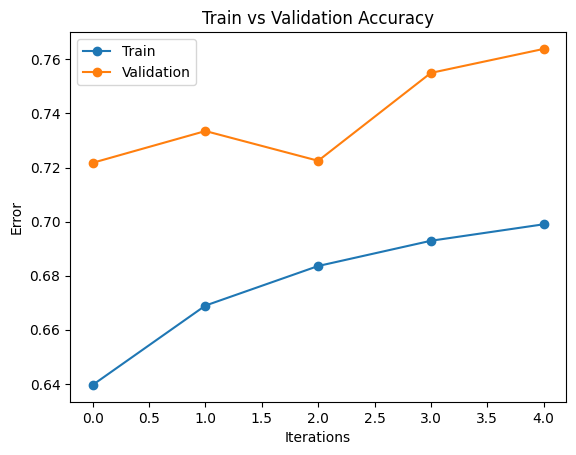

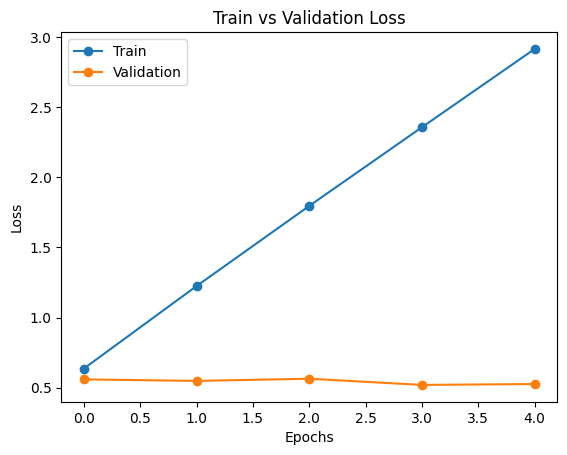

In [ ]:
# Try the Pooled method

sentiment_config = set_sentiment_config(
    lr=0.001,
    epochs=5,
    model_type="pooled",
    hidden_neurons=512,
    dropout=0.3,
)

best_pooled_model = train_model(
    train_data_loader,
    valid_data_loader,
    sentiment_config,
    plot=True,
    log=True)

Training with GPU... 

EPOCH: 1


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 0
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [1/5] → Train Acc: 0.8715, Train loss: 0.3072 | Validation Acc: 0.9056, Val loss: 0.2303
EPOCH: 2


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 1
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [2/5] → Train Acc: 0.8930, Train loss: 0.2644 | Validation Acc: 0.9146, Val loss: 0.2206
EPOCH: 3


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 2
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [3/5] → Train Acc: 0.9072, Train loss: 0.2377 | Validation Acc: 0.9159, Val loss: 0.2251
EPOCH: 4


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 3
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [4/5] → Train Acc: 0.9191, Train loss: 0.2149 | Validation Acc: 0.9121, Val loss: 0.2884
EPOCH: 5


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 4
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [5/5] → Train Acc: 0.9280, Train loss: 0.1965 | Validation Acc: 0.9157, Val loss: 0.2866
Best Model Path: /content/drive/Othercomputers/My laptop/Desktop/UofT/Term 2/MIE 1517/Assignment/Assignment 4/PartBCheckpoint/SentimentClassifier_last_hidden_neurons_256_dropout_0.3_epoch_2
Best model saved at iteration 2 with validation accuracy 0.9159


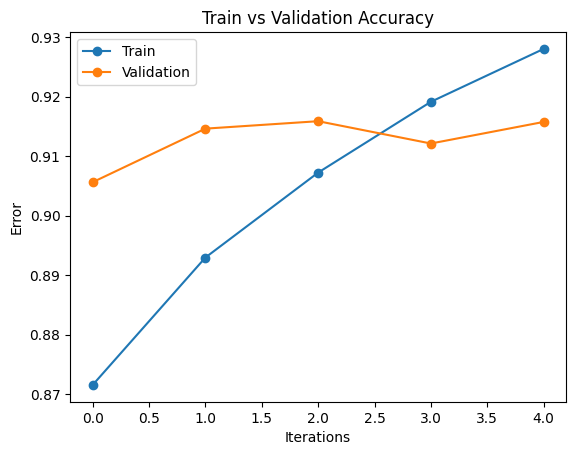

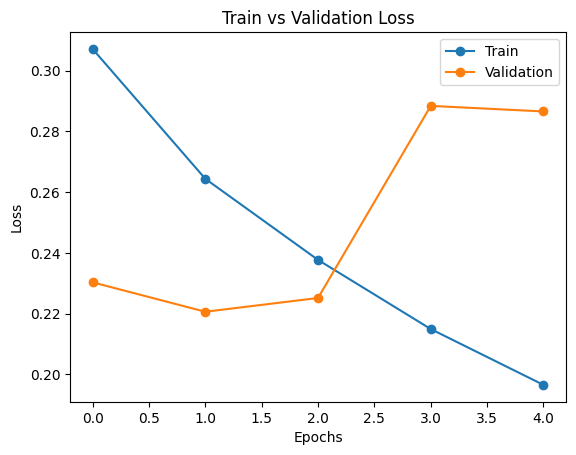

In [ ]:
# TO BE COMPLETED

# Try the last hidden layer Method

sentiment_config = set_sentiment_config(
    lr=0.001,
    epochs=5,
    model_type="last",
    hidden_neurons=256,
    dropout=0.3,
    num_layers=1
)

best_last_model = train_model(
    train_data_loader,
    valid_data_loader,
    sentiment_config,
    plot=True,
    log=True)

### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters. You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

From the two model above, we can notably tell that the model using the last hidden layer has a better accuracy and better generlization.

In this section, we will be tuning the hyperparameter for the model "SentimentClassifierLast()"

The 4 hyperparameters to tuned is the:
1. Number of layers in GRU layer
2. Hidden Dimensionin the GRU Layer
3. Dropout Rate
4. learning rate

Also in this section, trying new method to tune hyperparameter: Optuna
Reference:
- https://github.com/optuna/optuna-examples/blob/main/pytorch/pytorch_simple.py
- https://optuna.org/#code_examples

In [ ]:
!pip install optuna

In [ ]:
def train_evaluate(model, optimizer, criterion, trial):

  train_loader, valid_loader = train_data_loader, valid_data_loader

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)

  for epoch in range(2):
    print(f"EPOCH {epoch+1}/2")
    model.train()

    # Training
    for sample_batch in tqdm(train_loader, total=len(train_loader)):
      data = sample_batch["last_hidden"]
      labels = sample_batch["targets"]
      data, labels = data.to(device), labels.to(device)

      # Forward pass
      with torch.autocast(device_type="cuda"):
        outputs = model(data)
        loss = criterion(outputs, labels)

      # Backward Pass
      loss.backward()
      # Gradient Clipping
      torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
      optimizer.step()
      optimizer.zero_grad()
      torch.cuda.empty_cache()  # Free up memory

    # Validation
    val_accuracy = get_accuracy(model, valid_loader, model_type="last")

    trial.report(val_accuracy, epoch)

    # Handle pruning based on the intermediate value
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

  return val_accuracy

In [ ]:
# TO BE COMPLETED

import optuna
from optuna.trial import TrialState
import torch.optim as optim

def objective(trial):
  # Step 1: Sample hyperparameters from Optuna
  num_layers = trial.suggest_categorical("num_layers", [1, 2])  # 1 vs.2 layers
  hidden_neurons = trial.suggest_categorical("hidden_neuron", [128, 256])  # 128 vs. 256 hidden_dimension
  dropout = trial.suggest_categorical("dropout", [0.1, 0.3])  # 0.1 vs. 0.3 dropout
  learning_rate = trial.suggest_categorical("learning_rate", [1e-3, 1e-2])  # 0.001 vs. 0.01

  # Train the model
  model = SentimentClassifierLast(n_classes=2, hidden_neuron=hidden_neurons, dropout=dropout, num_layers=num_layers)
  optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay=1e-5)
  criterion = nn.CrossEntropyLoss()

  accuracy = train_evaluate(model, optimizer, criterion, trial)
  return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=8)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best Hyperparameters:", study.best_params)


[I 2025-03-20 20:58:10,758] A new study created in memory with name: no-name-f4905543-ee77-4f65-9dff-d9e1323107d3


EPOCH 1/2


  0%|          | 0/1500 [00:00<?, ?it/s]

EPOCH 2/2


  0%|          | 0/1500 [00:00<?, ?it/s]

[I 2025-03-20 21:11:45,984] Trial 0 finished with value: 0.804125 and parameters: {'num_layers': 1, 'hidden_neuron': 256, 'dropout': 0.1, 'learning_rate': 0.01}. Best is trial 0 with value: 0.804125.


EPOCH 1/2


  0%|          | 0/1500 [00:00<?, ?it/s]

EPOCH 2/2


  0%|          | 0/1500 [00:00<?, ?it/s]

[I 2025-03-20 21:25:40,646] Trial 1 finished with value: 0.908625 and parameters: {'num_layers': 2, 'hidden_neuron': 128, 'dropout': 0.3, 'learning_rate': 0.001}. Best is trial 1 with value: 0.908625.


EPOCH 1/2


  0%|          | 0/1500 [00:00<?, ?it/s]

EPOCH 2/2


  0%|          | 0/1500 [00:00<?, ?it/s]

[I 2025-03-20 21:41:07,728] Trial 2 finished with value: 0.9105 and parameters: {'num_layers': 2, 'hidden_neuron': 256, 'dropout': 0.1, 'learning_rate': 0.001}. Best is trial 2 with value: 0.9105.


EPOCH 1/2


  0%|          | 0/1500 [00:00<?, ?it/s]

EPOCH 2/2


  0%|          | 0/1500 [00:00<?, ?it/s]

[I 2025-03-20 21:53:57,488] Trial 3 finished with value: 0.91375 and parameters: {'num_layers': 1, 'hidden_neuron': 128, 'dropout': 0.1, 'learning_rate': 0.001}. Best is trial 3 with value: 0.91375.


EPOCH 1/2


  0%|          | 0/1500 [00:00<?, ?it/s]

EPOCH 2/2


  0%|          | 0/1500 [00:00<?, ?it/s]

[I 2025-03-20 22:07:40,478] Trial 4 finished with value: 0.727875 and parameters: {'num_layers': 1, 'hidden_neuron': 256, 'dropout': 0.3, 'learning_rate': 0.01}. Best is trial 3 with value: 0.91375.


EPOCH 1/2


  0%|          | 0/1500 [00:00<?, ?it/s]

EPOCH 2/2


  0%|          | 0/1500 [00:00<?, ?it/s]

Exception ignored in: <function tqdm.__del__ at 0x7acc666b59e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/usr/local/lib/python3.11/dist-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm' object has no attribute 'disp'
[I 2025-03-20 22:23:14,052] Trial 5 finished with value: 0.912 and parameters: {'num_layers': 2, 'hidden_neuron': 256, 'dropout': 0.1, 'learning_rate': 0.001}. Best is trial 3 with value: 0.91375.


EPOCH 1/2


  0%|          | 0/1500 [00:00<?, ?it/s]

EPOCH 2/2


  0%|          | 0/1500 [00:00<?, ?it/s]

[I 2025-03-20 22:38:33,997] Trial 6 finished with value: 0.911875 and parameters: {'num_layers': 2, 'hidden_neuron': 256, 'dropout': 0.1, 'learning_rate': 0.001}. Best is trial 3 with value: 0.91375.


EPOCH 1/2


  0%|          | 0/1500 [00:00<?, ?it/s]

[I 2025-03-20 22:44:53,720] Trial 7 pruned. 


Study statistics: 
  Number of finished trials:  8
  Number of pruned trials:  1
  Number of complete trials:  7
Best Hyperparameters: {'num_layers': 1, 'hidden_neuron': 128, 'dropout': 0.1, 'learning_rate': 0.001}


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Uses Optuna to ptimize hyperparameters for the SentimentClassifierLast model.
OBjective: Maximize Validation Accuracy

Hyperparameter Tuned:
- Number of layers in GRU layer
- Hidden Dimensionin the GRU Layer
- Dropout Rate
- learning rate

Best Hyperparameters: {'num_layers': 1, 'hidden_neuron': 128, 'dropout': 0.1, 'learning_rate': 0.001}

'''

"\nPROVIDE YOUR ANSWER BELOW\n\nUses Optuna to ptimize hyperparameters for the SentimentClassifierLast model.\nOBjective: Maximize Validation Accuracy\n\nHyperparameter Tuned:\n- Number of layers in GRU layer\n- Hidden Dimensionin the GRU Layer\n- Dropout Rate\n- learning rate\n\nBest Hyperparameters: {'num_layers': 1, 'hidden_neuron': 128, 'dropout': 0.1, 'learning_rate': 0.001}\n\n"

## Part 4. Evaluation [10 pt]

### Part (i) [3pt RESULT]

Report the final test accuracy of your best BERT-based model. Then summarize in a pandas dataframe the accuracy obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.



Training with GPU... 

EPOCH: 1


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 0
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [1/5] → Train Acc: 0.8705, Train loss: 0.3078 | Validation Acc: 0.9032, Val loss: 0.2329
EPOCH: 2


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 1
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [2/5] → Train Acc: 0.8958, Train loss: 0.2582 | Validation Acc: 0.9123, Val loss: 0.2291
EPOCH: 3


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 2
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [3/5] → Train Acc: 0.9113, Train loss: 0.2272 | Validation Acc: 0.9134, Val loss: 0.2487
EPOCH: 4


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 3
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [4/5] → Train Acc: 0.9239, Train loss: 0.2014 | Validation Acc: 0.9022, Val loss: 0.2957
EPOCH: 5


  0%|          | 0/1500 [00:00<?, ?it/s]

SAVING CHECKPOINT FOR CURRENT EPOCH: 4
Evaluating Validation Data
Use GPU for Evaluation


  0%|          | 0/500 [00:00<?, ?it/s]

Epochs [5/5] → Train Acc: 0.9335, Train loss: 0.1803 | Validation Acc: 0.9081, Val loss: 0.3329
Best Model Path: /content/drive/Othercomputers/My laptop/Desktop/UofT/Term 2/MIE 1517/Assignment/Assignment 4/PartBCheckpoint/SentimentClassifier_last_hidden_neurons_128_dropout_0.1_epoch_2
Best model saved at iteration 2 with validation accuracy 0.9134


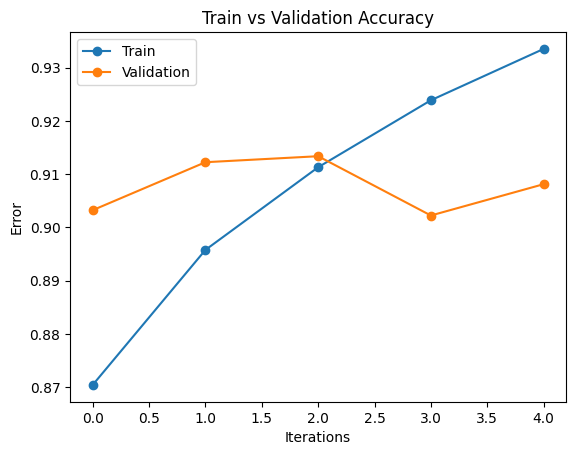

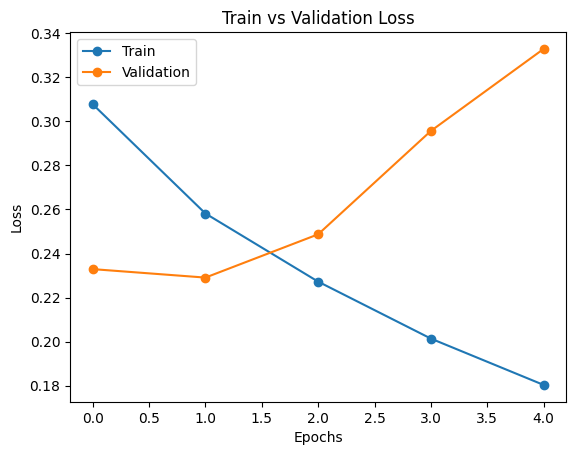

In [ ]:
# Train the model with the best hyperparameter
sentiment_config = set_sentiment_config(
    lr=0.001,
    epochs=5,
    model_type="last",
    hidden_neurons=128,
    dropout=0.1,
    num_layers=1
)

best_last_model = train_model(
    train_data_loader,
    valid_data_loader,
    sentiment_config,
    plot=True,
    log=True
)

In [ ]:
# TO BE COMPLETED

test_accuracy = get_accuracy(best_last_model, test_data_loader, model_type="last")
print(f"Test Accuracy: {test_accuracy:.4f}")



  0%|          | 0/500 [00:00<?, ?it/s]

Test Accuracy: 0.9115


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW


Training & Validation Loss:

Training loss decreased consistently over epochs, indicating effective learning.

Validation loss increased after epoch 2, suggesting potential overfitting.

Test Accuracy:

Achieved a test accuracy of 91.15%, indicating strong generalization.

Potential Improvements:

Reduce overfitting by increasing dropout or using early stopping.

Tune learning rate to prevent sharp divergence between training and validation loss.



'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\nTraining & Validation Loss:\n\nTraining loss decreased consistently over epochs, indicating effective learning.\n\nValidation loss increased after epoch 2, suggesting potential overfitting.\n\nTest Accuracy:\n\nAchieved a test accuracy of 91.15%, indicating strong generalization.\n\nPotential Improvements:\n\nReduce overfitting by increasing dropout or using early stopping.\n\nTune learning rate to prevent sharp divergence between training and validation loss.\n\n\n\n'

### Part (ii) [2pt RESULT]

Report the false positive rate and false negative rate of your model across the test set. Then summarize in a pandas dataframe the false postive and false negative rate of your model obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.

In [ ]:
# Define the best model
# Redefine RNN get_model_name
def get_rnn_model_name(rnn_config, iteration):
  parent_path = "/content/drive/Othercomputers/My laptop/Desktop/UofT/Term 2/MIE 1517/Assignment/Assignment 4/Checkpoint/"
  path = parent_path + f"RNN_embedding_dim_{rnn_config['embedding_dim']}_hidden_dim_{rnn_config['hidden_dim']}_num_layers_{rnn_config['num_layers']}_pooling_{rnn_config['pooling']}_iter_{iteration}"
  return path

# Train more epochs with the best configurations
best_rnn_config = set_rnn_config(
  embedding_dim=50,
  hidden_dim=100,
  pooling = 'max',
  rnn_type='GRU',
  num_layers=2
  )

best_rnn_model = SentimentRNN(vocab_size = len(stoi)+1, **best_rnn_config)
best_rnn_model_state = get_rnn_model_name(best_rnn_config, 5500)
best_rnn_model.load_state_dict(torch.load(best_rnn_model_state))


def get_bert_model_name(sentiment_config: dict, epoch):
  parent_path = "/content/drive/Othercomputers/My laptop/Desktop/UofT/Term 2/MIE 1517/Assignment/Assignment 4/PartBCheckpoint/"
  name = f"SentimentClassifier_{sentiment_config['model_type']}_hidden_neurons_{sentiment_config['hidden_neurons']}_dropout_{sentiment_config['dropout']}_epoch_{epoch}"
  path = parent_path + name
  return path

best_last_config = set_sentiment_config(
    lr=0.001,
    epochs=5,
    model_type="last",
    hidden_neurons=128,
    dropout=0.1,
    num_layers=1
)

best_bert_model = SentimentClassifierLast(n_classes=2, hidden_neuron=best_last_config["hidden_neurons"], dropout=best_last_config["dropout"], num_layers=best_last_config["num_layers"])
best_bert_model_path = get_bert_model_name(best_last_config, epoch = 2)
best_bert_model_state = torch.load(best_bert_model_path)
best_bert_model.load_state_dict(best_bert_model_state)

<All keys matched successfully>

Helper function to compute the false positive/negative rate

In [ ]:
# TO BE COMPLETED
import torch
import pandas as pd

def compute_bert_fpr_fnr(model, data_loader, device):
    """Compute False Positive Rate (FPR) and False Negative Rate (FNR) for a given model and dataset"""
    model.eval()
    model.to(device)

    false_positives, false_negatives = 0, 0
    total_positives, total_negatives = 0, 0

    with torch.no_grad():
        for batch in tqdm(data_loader, total=len(data_loader)):
            inputs, labels = batch["last_hidden"].to(device), batch["targets"].to(device)

            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)  # Get predicted class

            # Compute FP and FN
            false_positives += ((predictions == 1) & (labels == 0)).sum().item()
            false_negatives += ((predictions == 0) & (labels == 1)).sum().item()

            # Count total positive and negative labels
            total_positives += (labels == 1).sum().item()
            total_negatives += (labels == 0).sum().item()

    # Compute FPR and FNR
    fpr = false_positives / total_negatives if total_negatives > 0 else 0.0
    fnr = false_negatives / total_positives if total_positives > 0 else 0.0

    return fpr, fnr

def compute_rnn_fpr_fnr(model, data_loader, device):
    """Compute False Positive Rate (FPR) and False Negative Rate (FNR) for a given model and dataset"""
    model.eval()
    model.to(device)

    false_positives, false_negatives = 0, 0
    total_positives, total_negatives = 0, 0

    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, total=len(data_loader)):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)  # Get predicted class

            # Compute FP and FN
            false_positives += ((predictions == 1) & (labels == 0)).sum().item()
            false_negatives += ((predictions == 0) & (labels == 1)).sum().item()

            # Count total positive and negative labels
            total_positives += (labels == 1).sum().item()
            total_negatives += (labels == 0).sum().item()

    # Compute FPR and FNR
    fpr = false_positives / total_negatives if total_negatives > 0 else 0.0
    fnr = false_negatives / total_positives if total_positives > 0 else 0.0

    return fpr, fnr

In [ ]:

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Compute FPR & FNR for BERT model(Test Dataset)
bert_fpr_test, bert_fnr_test = compute_bert_fpr_fnr(best_last_model, test_data_loader, device)
print(f"Best Model From Part B: False Positive Rate {bert_fpr_test}, False Negative Rate {bert_fnr_test}")

  0%|          | 0/500 [00:00<?, ?it/s]

Best Model From Part B: False Positive Rate 0.06946526736631684, False Negative Rate 0.10755377688844422


In [ ]:
# Repeat for validation and training for both Part A model and Part B model
bert_fpr_valid, bert_fnr_valid = compute_bert_fpr_fnr(best_last_model, valid_data_loader, device)
bert_fpr_train, bert_fnr_train = compute_bert_fpr_fnr(best_last_model, train_data_loader, device)
rnn_fpr_test, rnn_fnr_test = compute_rnn_fpr_fnr(best_rnn_model, test_loader, device)
rnn_fpr_valid, rnn_fnr_valid = compute_rnn_fpr_fnr(best_rnn_model, valid_loader, device)
rnn_fpr_train, rnn_fnr_train = compute_rnn_fpr_fnr(best_rnn_model, train_loader, device)

# Create DataFrame respectively (Column: Train, Valid, Test) (Row: fpr, fnr)
bert_fpr_fnr_df = pd.DataFrame({"False Positive Rate": [bert_fpr_train, bert_fpr_valid, bert_fpr_test],
                                "False Negative Rate": [bert_fnr_train, bert_fnr_valid, bert_fnr_test]},
                                index=["Train", "Validation", "Test"])

rnn_fpr_fnr_df = pd.DataFrame({"False Positive Rate": [rnn_fpr_train, rnn_fpr_valid, rnn_fpr_test],
                                "False Negative Rate": [rnn_fnr_train, rnn_fnr_valid, rnn_fnr_test]},
                                index=["Train", "Validaion", "Test"])


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

In [ ]:
bert_fpr_fnr_df

,False Positive Rate,False Negative Rate
Train,0.030982,0.055783
Validation,0.066215,0.106903
Test,0.069465,0.107554


In [ ]:
rnn_fpr_fnr_df

,False Positive Rate,False Negative Rate
Train,0.104772,0.089636
Validaion,0.148483,0.150760
Test,0.162919,0.135068


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The results show that the BERT model outperforms the RNN model (LSTM/GRU) in both false positive rate (FPR) and false negative rate (FNR) across all datasets.
BERT generalizes better, with lower error rates in the test set, while the RNN model struggles with overfitting and higher misclassification rates.

BERT Model:

- Lower FPR (0.069) and FNR (0.107) on the test set.

- More consistent performance across training, validation, and test sets.

- Better generalization due to pre-trained embeddings.

RNN Model:

- Higher FPR (0.162) and FNR (0.135) on the test set.

- Overfitting is evident, with a large gap between training and test errors.

- Weaker performance in handling complex sentence structures.

Conclusion:

- BERT is the better model due to lower misclassification rates.

- RNN models struggle with overfitting and generalization in comparison.

- The results align with expectations, as BERT is designed for contextual understanding, while RNNs process sequences with limited memory.

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nThe results show that the BERT model outperforms the RNN model (LSTM/GRU) in both false positive rate (FPR) and false negative rate (FNR) across all datasets. \nBERT generalizes better, with lower error rates in the test set, while the RNN model struggles with overfitting and higher misclassification rates.\n\nBERT Model:\n\n- Lower FPR (0.069) and FNR (0.107) on the test set.\n\n- More consistent performance across training, validation, and test sets.\n\n- Better generalization due to pre-trained embeddings.\n\nRNN Model:\n\n- Higher FPR (0.162) and FNR (0.135) on the test set.\n\n- Overfitting is evident, with a large gap between training and test errors.\n\n- Weaker performance in handling complex sentence structures.\n\nConclusion:\n\n- BERT is the better model due to lower misclassification rates.\n\n- RNN models struggle with overfitting and generalization in comparison.\n\n- The results align with expectations, as BERT is designed for contextual u

### Part (iii) [3pt DISCUSSION]
Examine some of the misclassified reviews from you best BERT and LSTM models to better identify the differences in the models. Try to provide some justification for any differences in the misclassifications observed in the models.

Is there any part of the review that you could modify to make the classifications correct? Try to make small changes to the review to see if you can make the model make the correct classification while keeping the review as close to the original as possible.

Helper function to extract the missclassified reviews

In [ ]:
import random
from tqdm import tqdm

def get_misclassified_bert_samples(model, data_loader, device, num_samples=3):
    """Extract misclassified samples from BERT model predictions."""
    model.eval()
    model.to(device)

    misclassified_samples = []

    with torch.no_grad():
        for batch in data_loader:
            inputs, labels = batch["last_hidden"].to(device), batch["targets"].to(device)
            texts = batch["review_text"]  # Assuming "text" exists in BERT dataloader

            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)

            for i in range(len(labels)):
                if predictions[i] != labels[i]:  # Misclassified sample
                    misclassified_samples.append((texts[i], labels[i].item(), predictions[i].item()))

                if len(misclassified_samples) >= num_samples:
                    return misclassified_samples  # Stop once we collect enough

    return misclassified_samples  # Return collected misclassified samples

def get_misclassified_rnn_samples(model, data_loader, device, num_samples=3):

    def decode_text(encoded_data, itos):
      """
      Convert encoded data back to text using the itos (index-to-string) dictionary.
      """
      decoded_sentences = []

      for review in encoded_data:
          if isinstance(review, np.ndarray):  # Convert NumPy arrays to lists
              review = review.tolist()

          words = [itos[idx] for idx in review if idx in itos and idx != 0]  # Ignore padding (idx=0)
          decoded_sentences.append(" ".join(words))

      return decoded_sentences


    """Extract misclassified samples from RNN model and return decoded text."""
    model.eval()
    model.to(device)

    misclassified_samples = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)

            misclassified_indices = (predictions != labels).nonzero(as_tuple=True)[0].tolist()

            if misclassified_indices:
                encoded_sentences = inputs[misclassified_indices].cpu().numpy()  # Convert tensors to NumPy
                decoded_sentences = decode_text(encoded_sentences, itos)  # Decode text

                for idx, sentence in enumerate(decoded_sentences):
                    misclassified_samples.append((sentence, labels[misclassified_indices[idx]].item(), predictions[misclassified_indices[idx]].item()))

                if len(misclassified_samples) >= num_samples:
                    return misclassified_samples[:num_samples]  # Stop once we collect enough

    return misclassified_samples  # Return collected misclassified samples

def rnn_model_sentence_to_tensor(sentence, stoi, seq_len=500):
    """
    Convert a single sentence into a preprocessed, tokenized, and padded tensor
    that can be directly passed into the RNN model for inference.
    """
    # Step 1: Preprocess the sentence (remove stopwords, clean text)
    processed_words = preprocess_sentence(sentence)

    # Step 2: Convert words to indices using stoi (if word exists in vocabulary)
    encoded_sentence = [stoi[word] if word in stoi else stoi.get("<UNK>", 0) for word in processed_words]

    # Step 3: Apply padding to match model input size (seq_len)
    padded_sentence = np.zeros(seq_len, dtype=int)
    if len(encoded_sentence) > 0:
        padded_sentence[-len(encoded_sentence):] = np.array(encoded_sentence[:seq_len])  # Truncate if too long

    # Step 4: Convert to tensor (PyTorch expects tensors for inference)
    return torch.tensor(padded_sentence).unsqueeze(0).to(device)  # Add batch dimension

import torch

def bert_model_preprocess_sentence(sentence, max_len=400, device="cuda"):
    """
    Preprocess a sentence for BERT model inference.

    Args:
        sentence (str): The input text.
        tokenizer (transformers.PreTrainedTokenizer): The BERT tokenizer.
        max_len (int): The maximum sequence length.
        device (str): The device to run the model on ("cuda" or "cpu").
        return_embedding (bool): If True, returns pooled & last hidden state embeddings.
        bert_model (transformers.PreTrainedModel): Pretrained BERT model (required if return_embedding=True).

    Returns:
         Dictionary with 'pooled_output' and 'last_hidden' embeddings.
    """

    PRE_TRAINED_MODEL_NAME = 'bert-base-cased' #Specify which BERT model to use

    tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME) #Tokenizer for BERT
    bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME) #The pre-trained BERT model from Hugging Face

    # Step 1: Tokenize the input sentence
    encoding = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        max_length=max_len,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors="pt",
        truncation=True
    )

    # Move tensors to device
    encoding = {key: value.to(device) for key, value in encoding.items()}

    # Step 2: Get BERT embeddings
    bert_model = bert_model.to(device)
    bert_model.eval()

    with torch.no_grad():
        outputs = bert_model(
            input_ids=encoding["input_ids"],
            attention_mask=encoding["attention_mask"],
            output_hidden_states=True  # Extract hidden states
        )

    # Step 3: Extract embeddings
    last_hidden = outputs.hidden_states[-1].detach().cpu()  # Last hidden state

    return last_hidden




In [ ]:
# TO BE COMPLETED
bert_missclassified = get_misclassified_bert_samples(best_last_model, test_data_loader, device, num_samples=3)
rnn_missclassified = get_misclassified_rnn_samples(best_rnn_model, test_loader, device, num_samples=3)

In [ ]:
print(f"Bert Model Missclassified Example: \n {bert_missclassified[0][0]} \n Actual: {bert_missclassified[0][1]} \n Predict: {bert_missclassified[0][2]} \n")
print(f"RNN Model Missclassified Example: \n {rnn_missclassified[0][0]} \n Actual: {rnn_missclassified[0][1]} \n Predict: {rnn_missclassified[0][2]}")

Bert Model Missclassified Example: 
 This movie is actually FUNNY! If you'd like to rest your brain for an hour so then go ahead and watch it. It's called blonde and blonder, so don't expect profound and meaningful jokes. What this movie and enjoy all the stereotypes we have about two blondes. It's just a funny movie to watch on a date or with a company of friends (especially if you're not too sober. Lol ) Pamela and Denise are still pretty hot chicks. It's a mistake to judge this movie as a piece of art. C'mon, this movie is about BLONDES! It's supposed to be light, funny and superficial. One more thing, I do not think that girls will appreciate and like this movie but guy definitely will. 
 Actual: 1 
 Predict: 0 

RNN Model Missclassified Example: 
 film would characters first voice star make visual br early first couple features style made already almost couple later bit fairly decent however still shows comedy comic stage performance seems good cut lots different camera chance com

In [ ]:
# Try modifying the Bert Missclassified Reviews to make it predict Correct

modified_sentence = "This movie is actually FUNNY! If you'd like to rest your brain for an hour, then go ahead and watch it. It's called Blonde and Blonder, so just sit back and enjoy the lighthearted fun. What makes this movie great is embracing all the classic blonde stereotypes in a hilarious way. It's a perfect movie for a casual date night or with friends (especially if you're in the mood for laughs). Pamela and Denise are still pretty hot chicks, and they bring great energy to the screen. This movie isn't meant to be a masterpiece—it's all about light, fun, and humor. One more thing, I do think guys will especially enjoy it, and some girls might too!"

modified_sentence_embedding = bert_model_preprocess_sentence(modified_sentence)


with torch.no_grad():
    best_last_model.eval()
    best_last_model.to(device)
    modified_sentence_embedding = modified_sentence_embedding.to(device)
    output = best_last_model(modified_sentence_embedding)
    prediction = torch.argmax(output, dim=1)
    prediction = prediction.item()

print(f"Actual Label: {bert_missclassified[0][1]}, Original Prediction: {bert_missclassified[0][2]}, Modified Input Prediction: {prediction}")

Actual Label: 1, Original Prediction: 0, Modified Input Prediction: 1


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Justification (Difference between the two)

BERT retains stop words and punctuation, meaning it sees a fuller context of the sentence.
- Misclassified samples contain nuanced language, sarcasm, and mixed sentiment, such as:

- "One more thing, I do not think that girls will appreciate and like this movie but guy definitely will."

- BERT misclassified this because it contains humor and sarcasm, which BERT could possibly missclassify this as negative.

RNN (GRU) Misclassifications
- RNN preprocessing removes stop words and non-alphabetic characters (e.g., punctuation), resulting in disjointed and fragmented sentences.

- Example from the misclassified RNN review:

- "film would characters first voice star make visual br early first couple features style made already almost couple later bit fairly decent however still shows comedy comic stage"

- This sentence loses important structure and meaning due to preprocessing.
'''

### Part (iv) [2pt DISCUSSION]
Find 5 samples of positive and negative reviews on IMDB that were posted recently and evaluate them with your best BERT and LSTM models from parts A and B. How well do they perform?

In [ ]:
recent_reviews = [
    ("An engaging supernatural series with compelling characters. The chemistry between the leads makes it a must-watch.", 1),
    ("A groundbreaking film with stellar performances. It’s no surprise it’s leading the Oscar nominations.", 1),
    ("Despite its high production value, the series feels superficial and fails to engage the audience.", 0),
    ("Critically panned for its chaotic script and perceived propaganda. Holds a low rating on IMDb.", 0),
    ("A cinematic masterpiece that explores complex themes with grace. Truly deserving of its accolades.", 1)
]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("BERT Model Inference")
# BERT model inference
for review, label in recent_reviews:
    review_embedding = bert_model_preprocess_sentence(review, device=device).to(device)

    with torch.no_grad():
        best_last_model.eval()
        best_last_model.to(device)

        output = best_last_model(review_embedding)
        prediction = torch.argmax(output, dim=1).item()

    print(f"Review: {review}\n Actual Label: {label}, BERT Prediction: {prediction} \n")

print("GRU Model Inference")
# RNN model inference
for review, label in recent_reviews:
    review_tensor = rnn_model_sentence_to_tensor(review, stoi)

    with torch.no_grad():
        best_rnn_model.eval()
        best_rnn_model.to(device)

        output = best_rnn_model(review_tensor)
        prediction = torch.argmax(output, dim=1).item()

    print(f"Review: {review}\n Actual Label: {label}, RNN Prediction: {prediction} \n")


BERT Model Inference


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Review: An engaging supernatural series with compelling characters. The chemistry between the leads makes it a must-watch.
 Actual Label: 1, BERT Prediction: 1 

Review: A groundbreaking film with stellar performances. It’s no surprise it’s leading the Oscar nominations.
 Actual Label: 1, BERT Prediction: 1 

Review: Despite its high production value, the series feels superficial and fails to engage the audience.
 Actual Label: 0, BERT Prediction: 0 

Review: Critically panned for its chaotic script and perceived propaganda. Holds a low rating on IMDb.
 Actual Label: 0, BERT Prediction: 0 

Review: A cinematic masterpiece that explores complex themes with grace. Truly deserving of its accolades.
 Actual Label: 1, BERT Prediction: 1 

GRU Model Inference
Review: An engaging supernatural series with compelling characters. The chemistry between the leads makes it a must-watch.
 Actual Label: 1, RNN Prediction: 1 

Review: A groundbreaking film with stellar performances. It’s no surprise i

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Both BERT and RNN models achieved 100% accuracy, correctly classifying all five reviews (three positive, two negative).

BERT Model: Effectively captured contextual meaning, handling both positive and negative reviews well.

RNN Model: Performed equally well despite its simpler architecture.

Conclusion: Both models are robust and reliable on this test set, with no misclassifications.




'''

'\nPROVIDE YOUR ANSWER BELOW\n\nBoth BERT and RNN models achieved 100% accuracy, correctly classifying all five reviews (three positive, two negative).\n\nBERT Model: Effectively captured contextual meaning, handling both positive and negative reviews well.\n\nRNN Model: Performed equally well despite its simpler architecture.\n\nConclusion: Both models are robust and reliable on this test set, with no misclassifications.\n\n\n\n\n'

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to take on a challenging task.

In part A we constructed and trained an LSTM model to identify the sentiment in movie reviews. In Part B we used the embeddings of a BERT model pretrained on a large corpus of text to demonstrate how transfer learning can be used to improve our movie sentiment model. The BERT model is one of many language models that we could have used to implement transfer learning.

For this bonus challenge you are asked to implement a generative character-level LSTM model to produce IMDB movie reviews. Once the model is sufficiently trained you can then use its hidden states as the embedding for training a movie sentiment model. Construct your new movie sentiment analysis model and compare the performance against the model from part A and B.

There are many variants of a generative LSTM model that you can consider. As a starting point you can use the generative LSTM sample code provided in the lecture notes. Specifically, the one used to generate Shakeaspeare. More advanced versions of a generative LSTM can be found in the Universal Language Model Fine-turing for Text Classification (ULMfit) paper (https://arxiv.org/abs/1801.06146).

Tasks:

1. Create a generative character-level LSTM model trained to create IMDB reviews
2. Create a classifier using the embeddings from the generative LSTM model (from step 1) to identify positive and negative reviews.
3. Compare the performance of the model with the results in parts A and B of the assignment.
4. Upgrade the generative LSTM model using the techniques listed in the ULMfit paper (e.g., bi-directional LSTM, pretraining with wikipedia text and fine-tuning on IMDBT reviews, etc.).

Bonus marks will be provided based on the number of steps completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.


In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%cd /content

/content


In [224]:
#!pip install nbconvert

%%shell
jupyter nbconvert --to html /content/A4.ipynb


[NbConvertApp] WARNING | pattern '/content/A4.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
   

CalledProcessError: Command 'jupyter nbconvert --to html /content/A4.ipynb
' returned non-zero exit status 255.

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **10 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**